## Pre HW

In [1]:
import numpy as np

In [2]:
a = np.array([[-2,2,2,0],[1,-1,-1,0],[0,0,0,2]])
print(a)

[[-2  2  2  0]
 [ 1 -1 -1  0]
 [ 0  0  0  2]]


In [5]:
u,s,vh = np.linalg.svd(a, full_matrices=False)
print(u)
print(s)
print(vh)

[[ 0.89442719  0.          0.4472136 ]
 [-0.4472136   0.          0.89442719]
 [ 0.          1.          0.        ]]
[3.87298335e+00 2.00000000e+00 1.40433339e-16]
[[-0.57735027  0.57735027  0.57735027  0.        ]
 [-0.          0.          0.          1.        ]
 [-0.81649658 -0.40824829 -0.40824829  0.        ]]


In [8]:
print(np.diag(s))

[[3.87298335e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 2.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.40433339e-16]]


In [9]:
np.matmul(np.matmul(u,np.diag(s)),vh)

array([[-2.,  2.,  2.,  0.],
       [ 1., -1., -1.,  0.],
       [ 0.,  0.,  0.,  2.]])

In [11]:
p = np.array([[1,4,3],[2,-2,4],[3,-6,-2],[4,-7,1]])
print(p)
x=np.array([1,2,3,5])
print(x)
print(x.shape)

[[ 1  4  3]
 [ 2 -2  4]
 [ 3 -6 -2]
 [ 4 -7  1]]
[1 2 3 5]
(4,)


In [14]:
m = np.matmul(np.linalg.inv(np.matmul(p.T,p)),p.T)
print(m)
a = np.matmul(m,x)
print(a)

[[ 0.38280693 -0.17573023  0.25005937  0.05461886]
 [ 0.21253859 -0.11493707  0.06625505 -0.0453574 ]
 [-0.07860366  0.22053352 -0.16156099  0.0305549 ]]
[ 1.05461886 -0.0453574   0.0305549 ]


In [15]:
x_star = np.matmul(p,a)
print(x_star)
x_e = x - x_star
print(x_e)

[0.96485395 2.32217209 3.37489116 4.5665321 ]
[ 0.03514605 -0.32217209 -0.37489116  0.4334679 ]


In [20]:
np.dot(x_e,x_star)

-4.75175454539567e-14

## HW 2

In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(2021)

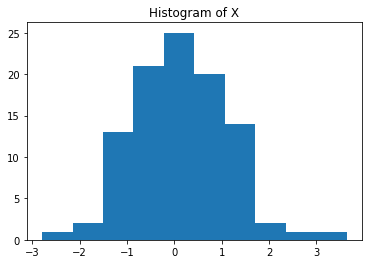

In [2]:
X = np.random.randn(100)
plt.hist(X)
plt.title("Histogram of X")
plt.show()

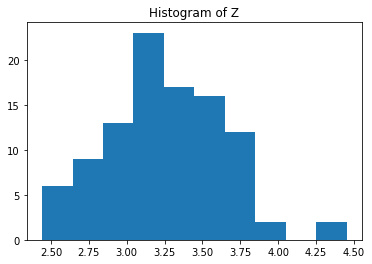

In [12]:
z=[]
beta = 3
m = 10**beta

for i in range (100):
    X = np.random.randn(m)
    z.append(np.max(X))

plt.hist(z)
plt.title("Histogram of Z")
plt.show()

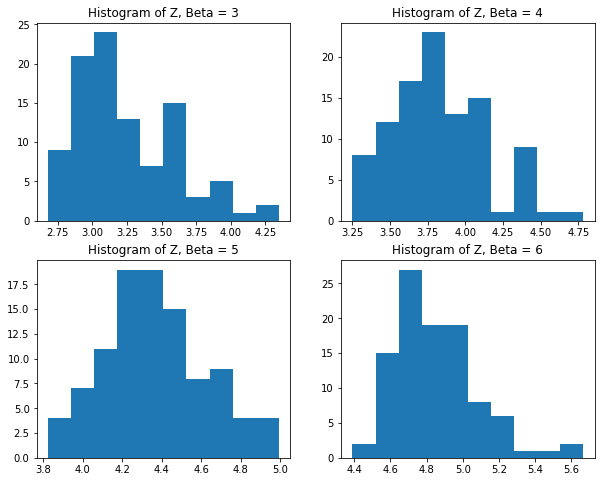

In [16]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(2021)

n=1
plt.figure(figsize=(10,8))
for beta in [3,4,5,6]:
    m = 10**beta
    mat = np.zeros((m,100)) # Sampling 100 points 

    for i in range (m):
        mat[i,:] = np.random.randn(100)
    
    plt.subplot(2,2,n)
    n=n+1
    z = np.max(mat, axis = 0)
    plt.hist(z)
    plt.title("Histogram of Z, Beta = " + str(beta))
plt.show()

In [3]:
n = 10
m = 1000000
(1.0-(1.0-0.25**n)**m)

0.6146775532338038

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

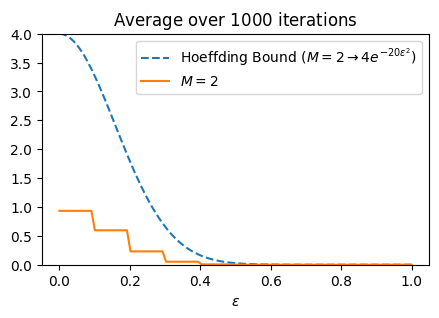

In [22]:
import matplotlib.pyplot as plt
import numpy as np

N = 10
M = 2
μ = 0.5

def hoeffding_bound(ε, N, M=2):
    return 2*M*np.exp(-2*N*ε**2)
def P(N, M, ε_space, μ):
    k = np.random.binomial(n=N,
                           p=μ,
                           size=(1_000, M))
    P = np.abs(k/N - μ).max(axis=1)
    return [(P > ε).mean() for ε in ε_space]
ε_space = np.linspace(0, 1, 100)
plt.figure(figsize=(5,3))
plt.plot(ε_space, hoeffding_bound(ε_space, N), '--',
         ε_space, P(10, 2, ε_space, μ))
plt.title('Average over $1000$ iterations')
plt.legend(['Hoeffding Bound '
            '($M=2 \\rightarrow 4e^{-20\epsilon^2}$)',
            '$M=2$'])
plt.ylim(0, 4)
plt.xlabel('$\epsilon$');

## HW3

### 3.2.1

In [2]:
import numpy as np
from scipy.special import comb
from scipy.optimize import fsolve

In [27]:
for N in [1e2,1e3,1e4]:
    s = comb(2*N,0) + comb(2*N,1) + comb(2*N,2) + comb(2*N,3) 
    print("N = ",N, " :", np.sqrt((8.0/N)*np.log((4*s)/0.05)))

N =  100.0  : 1.216070557399827
N =  1000.0  : 0.4507147727316804
N =  10000.0  : 0.16075006646481976


### 3.2.2

In [24]:
def func(N):
    s = comb(2*N,0) + comb(2*N,1) + comb(2*N,2) + comb(2*N,3) 
    return np.sqrt((8.0/N)*np.log((4*s)/0.05)) - 0.01

root = fsolve(func, 1e6)

print(np.ceil(root))

[4023411.]


## HW4

In [2]:
import numpy as np
from matplotlib import pyplot as plt
# from sklearn.preprocessing import PolynomialFeatures
# from sklearn.pipeline import make_pipeline
# from sklearn.linear_model import LinearRegression, Ridge
np.random.seed(20190226)

## Bias/Variance tradeoff

### Learning H0

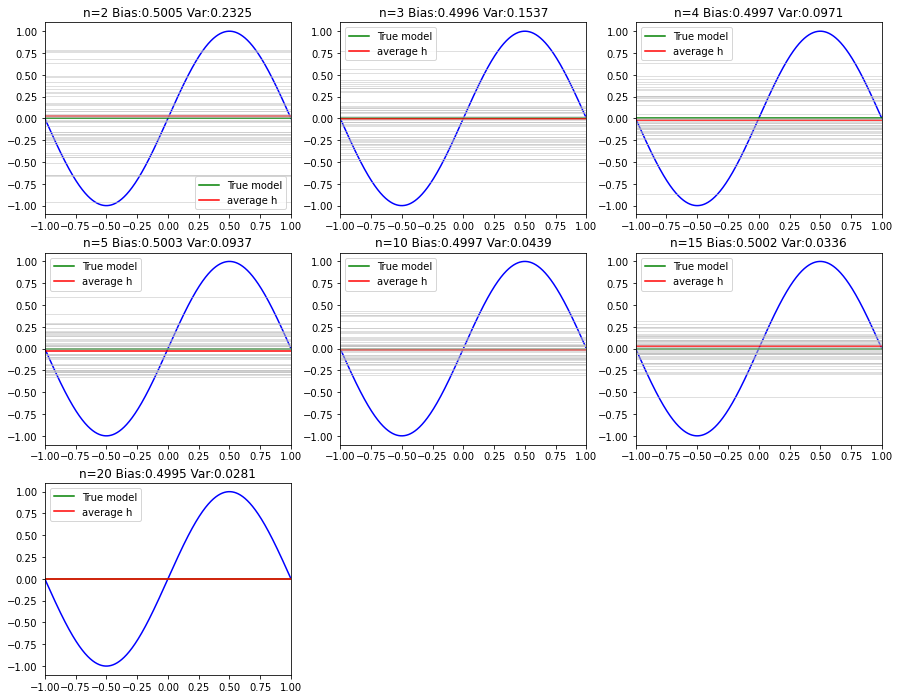

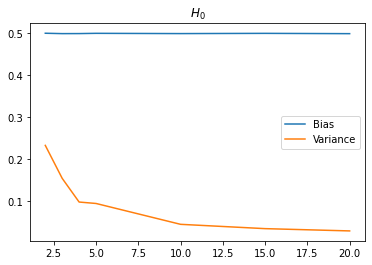

In [22]:
npts = 1000
x_range = np.linspace(-1.0,1.0,npts)
y_model = np.sin(np.pi*x_range)

bias_list = []
var_list = []
n_list = [2,3,4,5,10,15,20]
n_loops = 50

plt.figure(figsize = (15,12)); ss= 1;
for npoints in n_list:
    hd_matrix = np.zeros((n_loops,npts))

    for i in np.arange(n_loops):
        x = np.random.uniform(-1.0,1.0,npoints)
        y = np.sin(x*np.pi) 
        m = 0.0
        b = np.mean(y)
        y_fit = m*x_range+b
        hd_matrix[i,:] = y_fit
        plt.plot(x_range,y_fit,color='silver',linewidth=.5)

    y_avg = np.mean(hd_matrix,0)
    bias = np.mean((y_avg - y_model)**2)
    bias_list.append(bias)
    var=np.mean(np.mean((hd_matrix - y_avg)**2, axis = 0))
    var_list.append(var)
    
    plt.subplot(3,3,ss); ss = ss+1; 
    plt.plot(x_range,y_model,'b-')
    plt.plot(x_range,0.0*x_range,color='green',label='True model')
    plt.plot(x_range,y_avg,c='red',label='average h')
    plt.xlim([-1,1])
    plt.ylim([-1.1,1.1])
    plt.title("n=" + str(npoints) + " Bias:" + "{:.4f}".format(bias) + " Var:" + "{:.4f}".format(var))
    plt.legend()
plt.show()
plt.plot(n_list,bias_list)
plt.plot(n_list,var_list)
plt.title("$H_0$")
plt.legend(["Bias","Variance"])
plt.show()

### Learning H1

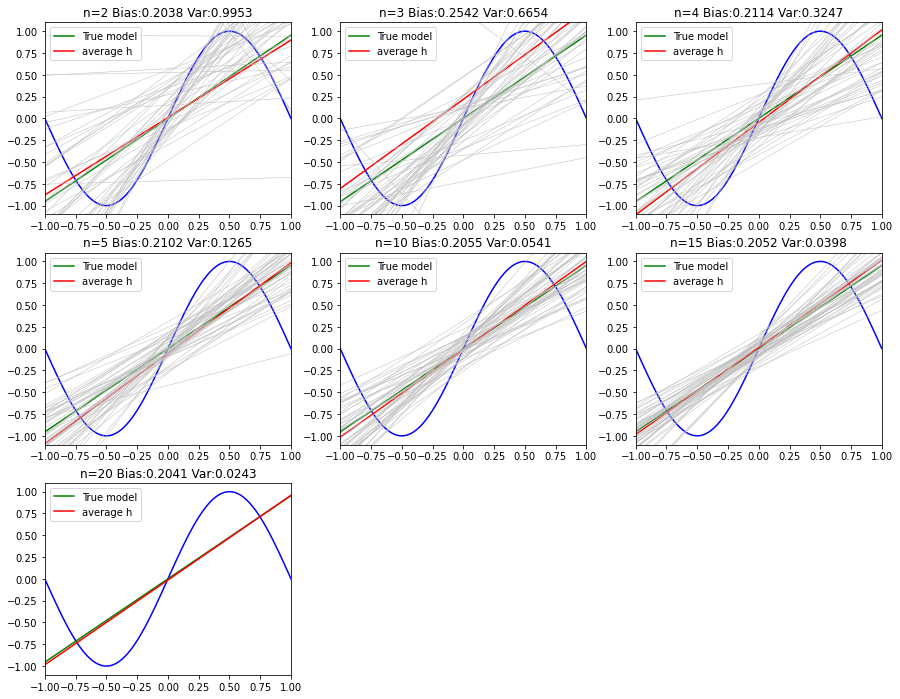

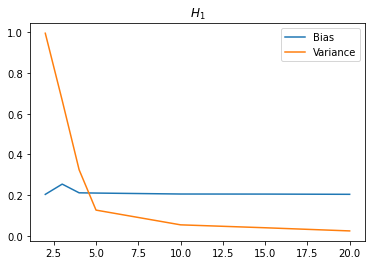

In [23]:
#np.random.seed(20190226)
npts = 100
x_range = np.linspace(-1.0,1.0,npts)
y_model = np.sin(np.pi*x_range)

bias_list = []
var_list = []
n_list = [2,3,4,5,10,15,20]
n_loops = 50

plt.figure(figsize = (15,12)); ss= 1;

for npoints in n_list:
    hd_matrix = np.zeros((n_loops,npts))
    for i in np.arange(n_loops):
        x = np.random.uniform(-1.0,1.0,npoints)
        y = np.sin(x*np.pi)

        x_mean = np.mean(x)
        y_mean = np.mean(y)
        m = (np.sum((x - x_mean)*(y - y_mean)))/np.sum((x-x_mean)**2)
        b = y_mean - m*x_mean

        y_fit = m*x_range+b
        hd_matrix[i,:] = y_fit
        plt.plot(x_range,y_fit,color='silver',linewidth=.5)
    
    y_avg = np.mean(hd_matrix,0)
    bias = np.mean((y_avg - y_model)**2)
    bias_list.append(bias)
    var=np.mean(np.mean((hd_matrix - y_avg)**2, axis = 0))
    var_list.append(var)
    
    plt.subplot(3,3,ss); ss = ss+1; 
    plt.plot(x_range,y_model,'b-')
    plt.plot(x_range,x_range*3.0/np.pi,color='green',label='True model')
    plt.plot(x_range,y_avg,c='red',label='average h')
    plt.xlim([-1,1])
    plt.ylim([-1.1,1.1])
    plt.title("n=" + str(npoints) + " Bias:" + "{:.4f}".format(bias) + " Var:" + "{:.4f}".format(var))
    plt.legend()
plt.show()
plt.plot(n_list,bias_list)
plt.plot(n_list,var_list)
plt.title("$H_1$")
plt.legend(["Bias","Variance"])
plt.show()

In [57]:
a = np.array([[1,2],[3,4]])
b = np.array([1,2])
(a-b)**2

array([[0, 0],
       [4, 4]])

In [ ]:
# 4.3.c

In [46]:
#np.random.seed(20190226)
npts = 100
x_range = np.linspace(-1.0,1.0,npts)
y_model = np.sin(np.pi*x_range)
n_loops = 50
npoints = 2
# risk_matrix = np.zeros((10,10))
risk_list = []

for l1 in np.logspace(-10,10,num=100):
    for l2 in np.logspace(-10,10,num=100):
        
        hd_matrix = np.zeros((n_loops,npts))
        for i in np.arange(n_loops):
            x = np.random.uniform(-1.0,1.0,npoints)
            y = np.sin(x*np.pi)

            A = np.array([[1,x[0]],[1,x[1]]])
            G = np.array([[l1,0],[0,l2]])

            theta = np.linalg.inv(A.T @ A + G.T @ G) @ A.T @ y 

            y_fit = theta[1]*x_range+theta[0]
            hd_matrix[i,:] = y_fit

        y_avg = np.mean(hd_matrix,0)

        risk=np.mean(np.mean((hd_matrix - y_model)**2, axis = 0))
        risk_list.append(risk)
#         risk_matrix[l1,l2] = risk 
        print(np.min(risk_list), "l1: ",l1," l2: ",l2)

2.3990565680625893 l1:  1e-10  l2:  1e-10
1.8893701881668485 l1:  1e-10  l2:  1.592282793341094e-10
1.8893701881668485 l1:  1e-10  l2:  2.5353644939701164e-10
1.8893701881668485 l1:  1e-10  l2:  4.03701725859655e-10
1.8893701881668485 l1:  1e-10  l2:  6.428073117284319e-10
1.8658584454880518 l1:  1e-10  l2:  1.0235310218990269e-09
1.8658584454880518 l1:  1e-10  l2:  1.6297508346206469e-09
1.8658584454880518 l1:  1e-10  l2:  2.595024211399732e-09
1.8658584454880518 l1:  1e-10  l2:  4.132012400115335e-09
1.4745834370576916 l1:  1e-10  l2:  6.579332246575682e-09
1.0511700952316188 l1:  1e-10  l2:  1.0476157527896662e-08
1.0511700952316188 l1:  1e-10  l2:  1.6681005372000592e-08
1.0511700952316188 l1:  1e-10  l2:  2.656087782946684e-08
1.0511700952316188 l1:  1e-10  l2:  4.229242874389499e-08
1.0511700952316188 l1:  1e-10  l2:  6.734150657750828e-08
1.0511700952316188 l1:  1e-10  l2:  1.0722672220103232e-07
1.0511700952316188 l1:  1e-10  l2:  1.7073526474706888e-07
1.0511700952316188 l1:  

0.6357854920790126 l1:  1.592282793341094e-10  l2:  0.04862601580065353
0.6357854920790126 l1:  1.592282793341094e-10  l2:  0.07742636826811278
0.6357854920790126 l1:  1.592282793341094e-10  l2:  0.12328467394420634
0.6357854920790126 l1:  1.592282793341094e-10  l2:  0.19630406500402683
0.6357854920790126 l1:  1.592282793341094e-10  l2:  0.31257158496882353
0.5732085319076919 l1:  1.592282793341094e-10  l2:  0.49770235643321137
0.5732085319076919 l1:  1.592282793341094e-10  l2:  0.7924828983539186
0.5732085319076919 l1:  1.592282793341094e-10  l2:  1.2618568830660184
0.5732085319076919 l1:  1.592282793341094e-10  l2:  2.009233002565046
0.5732085319076919 l1:  1.592282793341094e-10  l2:  3.1992671377973845
0.5732085319076919 l1:  1.592282793341094e-10  l2:  5.0941380148163855
0.5732085319076919 l1:  1.592282793341094e-10  l2:  8.111308307896856
0.5732085319076919 l1:  1.592282793341094e-10  l2:  12.915496650148826
0.5732085319076919 l1:  1.592282793341094e-10  l2:  20.565123083486515
0.

0.5732085319076919 l1:  2.5353644939701164e-10  l2:  5462.277217684337
0.5732085319076919 l1:  2.5353644939701164e-10  l2:  8697.490026177835
0.5732085319076919 l1:  2.5353644939701164e-10  l2:  13848.863713938747
0.5732085319076919 l1:  2.5353644939701164e-10  l2:  22051.30739903041
0.5732085319076919 l1:  2.5353644939701164e-10  l2:  35111.917342151275
0.5732085319076919 l1:  2.5353644939701164e-10  l2:  55908.10182512223
0.5732085319076919 l1:  2.5353644939701164e-10  l2:  89021.50854450393
0.5732085319076919 l1:  2.5353644939701164e-10  l2:  141747.4162926802
0.5732085319076919 l1:  2.5353644939701164e-10  l2:  225701.9719633917
0.5732085319076919 l1:  2.5353644939701164e-10  l2:  359381.36638046254
0.5732085319076919 l1:  2.5353644939701164e-10  l2:  572236.765935022
0.5732085319076919 l1:  2.5353644939701164e-10  l2:  911162.7561154868
0.5732085319076919 l1:  2.5353644939701164e-10  l2:  1450828.7784959432
0.5732085319076919 l1:  2.5353644939701164e-10  l2:  2310129.700083158
0.5

0.5333675720670723 l1:  4.03701725859655e-10  l2:  3944206059.437648
0.5333675720670723 l1:  4.03701725859655e-10  l2:  6280291441.834272
0.5333675720670723 l1:  4.03701725859655e-10  l2:  10000000000.0
0.5333675720670723 l1:  6.428073117284319e-10  l2:  1e-10
0.5333675720670723 l1:  6.428073117284319e-10  l2:  1.592282793341094e-10
0.5333675720670723 l1:  6.428073117284319e-10  l2:  2.5353644939701164e-10
0.5333675720670723 l1:  6.428073117284319e-10  l2:  4.03701725859655e-10
0.5333675720670723 l1:  6.428073117284319e-10  l2:  6.428073117284319e-10
0.5333675720670723 l1:  6.428073117284319e-10  l2:  1.0235310218990269e-09
0.5333675720670723 l1:  6.428073117284319e-10  l2:  1.6297508346206469e-09
0.5333675720670723 l1:  6.428073117284319e-10  l2:  2.595024211399732e-09
0.5333675720670723 l1:  6.428073117284319e-10  l2:  4.132012400115335e-09
0.5333675720670723 l1:  6.428073117284319e-10  l2:  6.579332246575682e-09
0.5333675720670723 l1:  6.428073117284319e-10  l2:  1.0476157527896662e

0.5333675720670723 l1:  1.0235310218990269e-09  l2:  0.0029836472402833404
0.5333675720670723 l1:  1.0235310218990269e-09  l2:  0.004750810162102793
0.5333675720670723 l1:  1.0235310218990269e-09  l2:  0.007564633275546291
0.5333675720670723 l1:  1.0235310218990269e-09  l2:  0.012045035402587835
0.5333675720670723 l1:  1.0235310218990269e-09  l2:  0.019179102616724848
0.5333675720670723 l1:  1.0235310218990269e-09  l2:  0.030538555088334123
0.5333675720670723 l1:  1.0235310218990269e-09  l2:  0.04862601580065353
0.5333675720670723 l1:  1.0235310218990269e-09  l2:  0.07742636826811278
0.5333675720670723 l1:  1.0235310218990269e-09  l2:  0.12328467394420634
0.5333675720670723 l1:  1.0235310218990269e-09  l2:  0.19630406500402683
0.5333675720670723 l1:  1.0235310218990269e-09  l2:  0.31257158496882353
0.5333675720670723 l1:  1.0235310218990269e-09  l2:  0.49770235643321137
0.5333675720670723 l1:  1.0235310218990269e-09  l2:  0.7924828983539186
0.5333675720670723 l1:  1.0235310218990269e-0

0.5333675720670723 l1:  1.6297508346206469e-09  l2:  20.565123083486515
0.5333675720670723 l1:  1.6297508346206469e-09  l2:  32.745491628777316
0.5333675720670723 l1:  1.6297508346206469e-09  l2:  52.14008287999674
0.5333675720670723 l1:  1.6297508346206469e-09  l2:  83.02175681319736
0.5333675720670723 l1:  1.6297508346206469e-09  l2:  132.19411484660287
0.5333675720670723 l1:  1.6297508346206469e-09  l2:  210.49041445120218
0.5333675720670723 l1:  1.6297508346206469e-09  l2:  335.1602650938834
0.5333675720670723 l1:  1.6297508346206469e-09  l2:  533.6699231206302
0.5333675720670723 l1:  1.6297508346206469e-09  l2:  849.7534359086438
0.5333675720670723 l1:  1.6297508346206469e-09  l2:  1353.0477745798075
0.5333675720670723 l1:  1.6297508346206469e-09  l2:  2154.4346900318865
0.5333675720670723 l1:  1.6297508346206469e-09  l2:  3430.469286314912
0.5333675720670723 l1:  1.6297508346206469e-09  l2:  5462.277217684337
0.5333675720670723 l1:  1.6297508346206469e-09  l2:  8697.490026177835


0.5333675720670723 l1:  2.595024211399732e-09  l2:  35111.917342151275
0.5333675720670723 l1:  2.595024211399732e-09  l2:  55908.10182512223
0.5333675720670723 l1:  2.595024211399732e-09  l2:  89021.50854450393
0.5333675720670723 l1:  2.595024211399732e-09  l2:  141747.4162926802
0.5333675720670723 l1:  2.595024211399732e-09  l2:  225701.9719633917
0.5333675720670723 l1:  2.595024211399732e-09  l2:  359381.36638046254
0.5333675720670723 l1:  2.595024211399732e-09  l2:  572236.765935022
0.5333675720670723 l1:  2.595024211399732e-09  l2:  911162.7561154868
0.5333675720670723 l1:  2.595024211399732e-09  l2:  1450828.7784959432
0.5333675720670723 l1:  2.595024211399732e-09  l2:  2310129.700083158
0.5333675720670723 l1:  2.595024211399732e-09  l2:  3678379.7718286193
0.5333675720670723 l1:  2.595024211399732e-09  l2:  5857020.818056673
0.5333675720670723 l1:  2.595024211399732e-09  l2:  9326033.46883218
0.5333675720670723 l1:  2.595024211399732e-09  l2:  14849682.622544697
0.533367572067072

0.5333675720670723 l1:  4.132012400115335e-09  l2:  37649358.06792456
0.5333675720670723 l1:  4.132012400115335e-09  l2:  59948425.03189421
0.5333675720670723 l1:  4.132012400115335e-09  l2:  95454845.66618328
0.5333675720670723 l1:  4.132012400115335e-09  l2:  151991108.2952927
0.5333675720670723 l1:  4.132012400115335e-09  l2:  242012826.47943833
0.5333675720670723 l1:  4.132012400115335e-09  l2:  385352859.37105197
0.5333675720670723 l1:  4.132012400115335e-09  l2:  613590727.3413188
0.5333675720670723 l1:  4.132012400115335e-09  l2:  977009957.2992246
0.5333675720670723 l1:  4.132012400115335e-09  l2:  1555676143.930466
0.5333675720670723 l1:  4.132012400115335e-09  l2:  2477076355.991714
0.5333675720670723 l1:  4.132012400115335e-09  l2:  3944206059.437648
0.5333675720670723 l1:  4.132012400115335e-09  l2:  6280291441.834272
0.5333675720670723 l1:  4.132012400115335e-09  l2:  10000000000.0
0.5333675720670723 l1:  6.579332246575682e-09  l2:  1e-10
0.5333675720670723 l1:  6.57933224

0.5333675720670723 l1:  1.0476157527896662e-08  l2:  0.0011768119524349992
0.5333675720670723 l1:  1.0476157527896662e-08  l2:  0.001873817422860383
0.5333675720670723 l1:  1.0476157527896662e-08  l2:  0.0029836472402833404
0.5333675720670723 l1:  1.0476157527896662e-08  l2:  0.004750810162102793
0.5333675720670723 l1:  1.0476157527896662e-08  l2:  0.007564633275546291
0.5333675720670723 l1:  1.0476157527896662e-08  l2:  0.012045035402587835
0.5333675720670723 l1:  1.0476157527896662e-08  l2:  0.019179102616724848
0.5333675720670723 l1:  1.0476157527896662e-08  l2:  0.030538555088334123
0.5333675720670723 l1:  1.0476157527896662e-08  l2:  0.04862601580065353
0.5333675720670723 l1:  1.0476157527896662e-08  l2:  0.07742636826811278
0.5333675720670723 l1:  1.0476157527896662e-08  l2:  0.12328467394420634
0.5333675720670723 l1:  1.0476157527896662e-08  l2:  0.19630406500402683
0.5333675720670723 l1:  1.0476157527896662e-08  l2:  0.31257158496882353
0.5333675720670723 l1:  1.047615752789666

0.5333675720670723 l1:  1.6681005372000592e-08  l2:  89021.50854450393
0.5333675720670723 l1:  1.6681005372000592e-08  l2:  141747.4162926802
0.5333675720670723 l1:  1.6681005372000592e-08  l2:  225701.9719633917
0.5333675720670723 l1:  1.6681005372000592e-08  l2:  359381.36638046254
0.5333675720670723 l1:  1.6681005372000592e-08  l2:  572236.765935022
0.5333675720670723 l1:  1.6681005372000592e-08  l2:  911162.7561154868
0.5333675720670723 l1:  1.6681005372000592e-08  l2:  1450828.7784959432
0.5333675720670723 l1:  1.6681005372000592e-08  l2:  2310129.700083158
0.5333675720670723 l1:  1.6681005372000592e-08  l2:  3678379.7718286193
0.5333675720670723 l1:  1.6681005372000592e-08  l2:  5857020.818056673
0.5333675720670723 l1:  1.6681005372000592e-08  l2:  9326033.46883218
0.5333675720670723 l1:  1.6681005372000592e-08  l2:  14849682.622544697
0.5333675720670723 l1:  1.6681005372000592e-08  l2:  23644894.12645407
0.5333675720670723 l1:  1.6681005372000592e-08  l2:  37649358.06792456
0.53

0.5333675720670723 l1:  4.229242874389499e-08  l2:  4.229242874389499e-08
0.5333675720670723 l1:  4.229242874389499e-08  l2:  6.734150657750828e-08
0.5333675720670723 l1:  4.229242874389499e-08  l2:  1.0722672220103232e-07
0.5333675720670723 l1:  4.229242874389499e-08  l2:  1.7073526474706888e-07
0.5333675720670723 l1:  4.229242874389499e-08  l2:  2.71858824273294e-07
0.5333675720670723 l1:  4.229242874389499e-08  l2:  4.3287612810830616e-07
0.5333675720670723 l1:  4.229242874389499e-08  l2:  6.892612104349695e-07
0.5333675720670723 l1:  4.229242874389499e-08  l2:  1.0974987654930568e-06
0.5333675720670723 l1:  4.229242874389499e-08  l2:  1.747528400007683e-06
0.5333675720670723 l1:  4.229242874389499e-08  l2:  2.782559402207126e-06
0.5333675720670723 l1:  4.229242874389499e-08  l2:  4.430621457583877e-06
0.5333675720670723 l1:  4.229242874389499e-08  l2:  7.0548023107186455e-06
0.5333675720670723 l1:  4.229242874389499e-08  l2:  1.1233240329780266e-05
0.5333675720670723 l1:  4.2292428

0.5333675720670723 l1:  6.734150657750828e-08  l2:  0.0001830738280295366
0.5333675720670723 l1:  6.734150657750828e-08  l2:  0.0002915053062825176
0.5333675720670723 l1:  6.734150657750828e-08  l2:  0.0004641588833612782
0.5333675720670723 l1:  6.734150657750828e-08  l2:  0.0007390722033525775
0.5333675720670723 l1:  6.734150657750828e-08  l2:  0.0011768119524349992
0.5333675720670723 l1:  6.734150657750828e-08  l2:  0.001873817422860383
0.5333675720670723 l1:  6.734150657750828e-08  l2:  0.0029836472402833404
0.5333675720670723 l1:  6.734150657750828e-08  l2:  0.004750810162102793
0.5333675720670723 l1:  6.734150657750828e-08  l2:  0.007564633275546291
0.5333675720670723 l1:  6.734150657750828e-08  l2:  0.012045035402587835
0.5333675720670723 l1:  6.734150657750828e-08  l2:  0.019179102616724848
0.5333675720670723 l1:  6.734150657750828e-08  l2:  0.030538555088334123
0.5333675720670723 l1:  6.734150657750828e-08  l2:  0.04862601580065353
0.5333675720670723 l1:  6.734150657750828e-08 

0.5266818243805813 l1:  1.0722672220103232e-07  l2:  22051.30739903041
0.5266818243805813 l1:  1.0722672220103232e-07  l2:  35111.917342151275
0.5266818243805813 l1:  1.0722672220103232e-07  l2:  55908.10182512223
0.5266818243805813 l1:  1.0722672220103232e-07  l2:  89021.50854450393
0.5266818243805813 l1:  1.0722672220103232e-07  l2:  141747.4162926802
0.5266818243805813 l1:  1.0722672220103232e-07  l2:  225701.9719633917
0.5266818243805813 l1:  1.0722672220103232e-07  l2:  359381.36638046254
0.5266818243805813 l1:  1.0722672220103232e-07  l2:  572236.765935022
0.5266818243805813 l1:  1.0722672220103232e-07  l2:  911162.7561154868
0.5266818243805813 l1:  1.0722672220103232e-07  l2:  1450828.7784959432
0.5266818243805813 l1:  1.0722672220103232e-07  l2:  2310129.700083158
0.5266818243805813 l1:  1.0722672220103232e-07  l2:  3678379.7718286193
0.5266818243805813 l1:  1.0722672220103232e-07  l2:  5857020.818056673
0.5266818243805813 l1:  1.0722672220103232e-07  l2:  9326033.46883218
0.52

0.5266818243805813 l1:  2.71858824273294e-07  l2:  4.132012400115335e-09
0.5266818243805813 l1:  2.71858824273294e-07  l2:  6.579332246575682e-09
0.5266818243805813 l1:  2.71858824273294e-07  l2:  1.0476157527896662e-08
0.5266818243805813 l1:  2.71858824273294e-07  l2:  1.6681005372000592e-08
0.5266818243805813 l1:  2.71858824273294e-07  l2:  2.656087782946684e-08
0.5266818243805813 l1:  2.71858824273294e-07  l2:  4.229242874389499e-08
0.5266818243805813 l1:  2.71858824273294e-07  l2:  6.734150657750828e-08
0.5266818243805813 l1:  2.71858824273294e-07  l2:  1.0722672220103232e-07
0.5266818243805813 l1:  2.71858824273294e-07  l2:  1.7073526474706888e-07
0.5266818243805813 l1:  2.71858824273294e-07  l2:  2.71858824273294e-07
0.5266818243805813 l1:  2.71858824273294e-07  l2:  4.3287612810830616e-07
0.5266818243805813 l1:  2.71858824273294e-07  l2:  6.892612104349695e-07
0.5266818243805813 l1:  2.71858824273294e-07  l2:  1.0974987654930568e-06
0.5266818243805813 l1:  2.71858824273294e-07  

0.5266818243805813 l1:  4.3287612810830616e-07  l2:  0.19630406500402683
0.5266818243805813 l1:  4.3287612810830616e-07  l2:  0.31257158496882353
0.5266818243805813 l1:  4.3287612810830616e-07  l2:  0.49770235643321137
0.5266818243805813 l1:  4.3287612810830616e-07  l2:  0.7924828983539186
0.5266818243805813 l1:  4.3287612810830616e-07  l2:  1.2618568830660184
0.5266818243805813 l1:  4.3287612810830616e-07  l2:  2.009233002565046
0.5266818243805813 l1:  4.3287612810830616e-07  l2:  3.1992671377973845
0.5266818243805813 l1:  4.3287612810830616e-07  l2:  5.0941380148163855
0.5266818243805813 l1:  4.3287612810830616e-07  l2:  8.111308307896856
0.5266818243805813 l1:  4.3287612810830616e-07  l2:  12.915496650148826
0.5266818243805813 l1:  4.3287612810830616e-07  l2:  20.565123083486515
0.5266818243805813 l1:  4.3287612810830616e-07  l2:  32.745491628777316
0.5266818243805813 l1:  4.3287612810830616e-07  l2:  52.14008287999674
0.5266818243805813 l1:  4.3287612810830616e-07  l2:  83.02175681

0.5266818243805813 l1:  6.892612104349695e-07  l2:  151991108.2952927
0.5266818243805813 l1:  6.892612104349695e-07  l2:  242012826.47943833
0.5266818243805813 l1:  6.892612104349695e-07  l2:  385352859.37105197
0.5266818243805813 l1:  6.892612104349695e-07  l2:  613590727.3413188
0.5266818243805813 l1:  6.892612104349695e-07  l2:  977009957.2992246
0.5266818243805813 l1:  6.892612104349695e-07  l2:  1555676143.930466
0.5266818243805813 l1:  6.892612104349695e-07  l2:  2477076355.991714
0.5266818243805813 l1:  6.892612104349695e-07  l2:  3944206059.437648
0.5266818243805813 l1:  6.892612104349695e-07  l2:  6280291441.834272
0.5266818243805813 l1:  6.892612104349695e-07  l2:  10000000000.0
0.5266818243805813 l1:  1.0974987654930568e-06  l2:  1e-10
0.5266818243805813 l1:  1.0974987654930568e-06  l2:  1.592282793341094e-10
0.5266818243805813 l1:  1.0974987654930568e-06  l2:  2.5353644939701164e-10
0.5266818243805813 l1:  1.0974987654930568e-06  l2:  4.03701725859655e-10
0.5266818243805813

0.5266818243805813 l1:  1.747528400007683e-06  l2:  1.0722672220103232e-07
0.5266818243805813 l1:  1.747528400007683e-06  l2:  1.7073526474706888e-07
0.5266818243805813 l1:  1.747528400007683e-06  l2:  2.71858824273294e-07
0.5266818243805813 l1:  1.747528400007683e-06  l2:  4.3287612810830616e-07
0.5266818243805813 l1:  1.747528400007683e-06  l2:  6.892612104349695e-07
0.5266818243805813 l1:  1.747528400007683e-06  l2:  1.0974987654930568e-06
0.5266818243805813 l1:  1.747528400007683e-06  l2:  1.747528400007683e-06
0.5266818243805813 l1:  1.747528400007683e-06  l2:  2.782559402207126e-06
0.5266818243805813 l1:  1.747528400007683e-06  l2:  4.430621457583877e-06
0.5266818243805813 l1:  1.747528400007683e-06  l2:  7.0548023107186455e-06
0.5266818243805813 l1:  1.747528400007683e-06  l2:  1.1233240329780266e-05
0.5266818243805813 l1:  1.747528400007683e-06  l2:  1.788649529057435e-05
0.5266818243805813 l1:  1.747528400007683e-06  l2:  2.848035868435799e-05
0.5266818243805813 l1:  1.7475284

0.5266818243805813 l1:  2.782559402207126e-06  l2:  3.1992671377973845
0.5266818243805813 l1:  2.782559402207126e-06  l2:  5.0941380148163855
0.5266818243805813 l1:  2.782559402207126e-06  l2:  8.111308307896856
0.5266818243805813 l1:  2.782559402207126e-06  l2:  12.915496650148826
0.5266818243805813 l1:  2.782559402207126e-06  l2:  20.565123083486515
0.5266818243805813 l1:  2.782559402207126e-06  l2:  32.745491628777316
0.5266818243805813 l1:  2.782559402207126e-06  l2:  52.14008287999674
0.5266818243805813 l1:  2.782559402207126e-06  l2:  83.02175681319736
0.5266818243805813 l1:  2.782559402207126e-06  l2:  132.19411484660287
0.5266818243805813 l1:  2.782559402207126e-06  l2:  210.49041445120218
0.5266818243805813 l1:  2.782559402207126e-06  l2:  335.1602650938834
0.5266818243805813 l1:  2.782559402207126e-06  l2:  533.6699231206302
0.5266818243805813 l1:  2.782559402207126e-06  l2:  849.7534359086438
0.5266818243805813 l1:  2.782559402207126e-06  l2:  1353.0477745798075
0.5266818243

0.5266818243805813 l1:  4.430621457583877e-06  l2:  1450828.7784959432
0.5266818243805813 l1:  4.430621457583877e-06  l2:  2310129.700083158
0.5266818243805813 l1:  4.430621457583877e-06  l2:  3678379.7718286193
0.5266818243805813 l1:  4.430621457583877e-06  l2:  5857020.818056673
0.5266818243805813 l1:  4.430621457583877e-06  l2:  9326033.46883218
0.5266818243805813 l1:  4.430621457583877e-06  l2:  14849682.622544697
0.5266818243805813 l1:  4.430621457583877e-06  l2:  23644894.12645407
0.5266818243805813 l1:  4.430621457583877e-06  l2:  37649358.06792456
0.5266818243805813 l1:  4.430621457583877e-06  l2:  59948425.03189421
0.5266818243805813 l1:  4.430621457583877e-06  l2:  95454845.66618328
0.5266818243805813 l1:  4.430621457583877e-06  l2:  151991108.2952927
0.5266818243805813 l1:  4.430621457583877e-06  l2:  242012826.47943833
0.5266818243805813 l1:  4.430621457583877e-06  l2:  385352859.37105197
0.5266818243805813 l1:  4.430621457583877e-06  l2:  613590727.3413188
0.52668182438058

0.5266818243805813 l1:  1.1233240329780266e-05  l2:  1.747528400007683e-06
0.5266818243805813 l1:  1.1233240329780266e-05  l2:  2.782559402207126e-06
0.5266818243805813 l1:  1.1233240329780266e-05  l2:  4.430621457583877e-06
0.5266818243805813 l1:  1.1233240329780266e-05  l2:  7.0548023107186455e-06
0.5266818243805813 l1:  1.1233240329780266e-05  l2:  1.1233240329780266e-05
0.5266818243805813 l1:  1.1233240329780266e-05  l2:  1.788649529057435e-05
0.5266818243805813 l1:  1.1233240329780266e-05  l2:  2.848035868435799e-05
0.5266818243805813 l1:  1.1233240329780266e-05  l2:  4.534878508128582e-05
0.5266818243805813 l1:  1.1233240329780266e-05  l2:  7.220809018385456e-05
0.5266818243805813 l1:  1.1233240329780266e-05  l2:  0.00011497569953977356
0.5266818243805813 l1:  1.1233240329780266e-05  l2:  0.0001830738280295366
0.5266818243805813 l1:  1.1233240329780266e-05  l2:  0.0002915053062825176
0.5266818243805813 l1:  1.1233240329780266e-05  l2:  0.0004641588833612782
0.5266818243805813 l1:

0.5266818243805813 l1:  1.788649529057435e-05  l2:  0.004750810162102793
0.5266818243805813 l1:  1.788649529057435e-05  l2:  0.007564633275546291
0.5266818243805813 l1:  1.788649529057435e-05  l2:  0.012045035402587835
0.5266818243805813 l1:  1.788649529057435e-05  l2:  0.019179102616724848
0.5266818243805813 l1:  1.788649529057435e-05  l2:  0.030538555088334123
0.5266818243805813 l1:  1.788649529057435e-05  l2:  0.04862601580065353
0.5266818243805813 l1:  1.788649529057435e-05  l2:  0.07742636826811278
0.5266818243805813 l1:  1.788649529057435e-05  l2:  0.12328467394420634
0.5266818243805813 l1:  1.788649529057435e-05  l2:  0.19630406500402683
0.5266818243805813 l1:  1.788649529057435e-05  l2:  0.31257158496882353
0.5266818243805813 l1:  1.788649529057435e-05  l2:  0.49770235643321137
0.5266818243805813 l1:  1.788649529057435e-05  l2:  0.7924828983539186
0.5266818243805813 l1:  1.788649529057435e-05  l2:  1.2618568830660184
0.5266818243805813 l1:  1.788649529057435e-05  l2:  2.0092330

0.5266818243805813 l1:  2.848035868435799e-05  l2:  8.111308307896856
0.5266818243805813 l1:  2.848035868435799e-05  l2:  12.915496650148826
0.5266818243805813 l1:  2.848035868435799e-05  l2:  20.565123083486515
0.5266818243805813 l1:  2.848035868435799e-05  l2:  32.745491628777316
0.5266818243805813 l1:  2.848035868435799e-05  l2:  52.14008287999674
0.5266818243805813 l1:  2.848035868435799e-05  l2:  83.02175681319736
0.5266818243805813 l1:  2.848035868435799e-05  l2:  132.19411484660287
0.5266818243805813 l1:  2.848035868435799e-05  l2:  210.49041445120218
0.5266818243805813 l1:  2.848035868435799e-05  l2:  335.1602650938834
0.5266818243805813 l1:  2.848035868435799e-05  l2:  533.6699231206302
0.5266818243805813 l1:  2.848035868435799e-05  l2:  849.7534359086438
0.5266818243805813 l1:  2.848035868435799e-05  l2:  1353.0477745798075
0.5266818243805813 l1:  2.848035868435799e-05  l2:  2154.4346900318865
0.5266818243805813 l1:  2.848035868435799e-05  l2:  3430.469286314912
0.52668182438

0.5266818243805813 l1:  4.534878508128582e-05  l2:  1450828.7784959432
0.5266818243805813 l1:  4.534878508128582e-05  l2:  2310129.700083158
0.5266818243805813 l1:  4.534878508128582e-05  l2:  3678379.7718286193
0.5266818243805813 l1:  4.534878508128582e-05  l2:  5857020.818056673
0.5266818243805813 l1:  4.534878508128582e-05  l2:  9326033.46883218
0.5266818243805813 l1:  4.534878508128582e-05  l2:  14849682.622544697
0.5266818243805813 l1:  4.534878508128582e-05  l2:  23644894.12645407
0.5266818243805813 l1:  4.534878508128582e-05  l2:  37649358.06792456
0.5266818243805813 l1:  4.534878508128582e-05  l2:  59948425.03189421
0.5266818243805813 l1:  4.534878508128582e-05  l2:  95454845.66618328
0.5266818243805813 l1:  4.534878508128582e-05  l2:  151991108.2952927
0.5266818243805813 l1:  4.534878508128582e-05  l2:  242012826.47943833
0.5266818243805813 l1:  4.534878508128582e-05  l2:  385352859.37105197
0.5266818243805813 l1:  4.534878508128582e-05  l2:  613590727.3413188
0.52668182438058

0.5266818243805813 l1:  0.00011497569953977356  l2:  2.782559402207126e-06
0.5266818243805813 l1:  0.00011497569953977356  l2:  4.430621457583877e-06
0.5266818243805813 l1:  0.00011497569953977356  l2:  7.0548023107186455e-06
0.5266818243805813 l1:  0.00011497569953977356  l2:  1.1233240329780266e-05
0.5266818243805813 l1:  0.00011497569953977356  l2:  1.788649529057435e-05
0.5266818243805813 l1:  0.00011497569953977356  l2:  2.848035868435799e-05
0.5266818243805813 l1:  0.00011497569953977356  l2:  4.534878508128582e-05
0.5266818243805813 l1:  0.00011497569953977356  l2:  7.220809018385456e-05
0.5266818243805813 l1:  0.00011497569953977356  l2:  0.00011497569953977356
0.5266818243805813 l1:  0.00011497569953977356  l2:  0.0001830738280295366
0.5266818243805813 l1:  0.00011497569953977356  l2:  0.0002915053062825176
0.5266818243805813 l1:  0.00011497569953977356  l2:  0.0004641588833612782
0.5266818243805813 l1:  0.00011497569953977356  l2:  0.0007390722033525775
0.5266818243805813 l1:

0.5266818243805813 l1:  0.0001830738280295366  l2:  52.14008287999674
0.5266818243805813 l1:  0.0001830738280295366  l2:  83.02175681319736
0.5266818243805813 l1:  0.0001830738280295366  l2:  132.19411484660287
0.5266818243805813 l1:  0.0001830738280295366  l2:  210.49041445120218
0.5266818243805813 l1:  0.0001830738280295366  l2:  335.1602650938834
0.5266818243805813 l1:  0.0001830738280295366  l2:  533.6699231206302
0.5266818243805813 l1:  0.0001830738280295366  l2:  849.7534359086438
0.5266818243805813 l1:  0.0001830738280295366  l2:  1353.0477745798075
0.5266818243805813 l1:  0.0001830738280295366  l2:  2154.4346900318865
0.5266818243805813 l1:  0.0001830738280295366  l2:  3430.469286314912
0.5266818243805813 l1:  0.0001830738280295366  l2:  5462.277217684337
0.5266818243805813 l1:  0.0001830738280295366  l2:  8697.490026177835
0.5266818243805813 l1:  0.0001830738280295366  l2:  13848.863713938747
0.5266818243805813 l1:  0.0001830738280295366  l2:  22051.30739903041
0.5266818243805

0.5266818243805813 l1:  0.0002915053062825176  l2:  10000000000.0
0.5266818243805813 l1:  0.0004641588833612782  l2:  1e-10
0.5266818243805813 l1:  0.0004641588833612782  l2:  1.592282793341094e-10
0.5266818243805813 l1:  0.0004641588833612782  l2:  2.5353644939701164e-10
0.5266818243805813 l1:  0.0004641588833612782  l2:  4.03701725859655e-10
0.5266818243805813 l1:  0.0004641588833612782  l2:  6.428073117284319e-10
0.5266818243805813 l1:  0.0004641588833612782  l2:  1.0235310218990269e-09
0.5266818243805813 l1:  0.0004641588833612782  l2:  1.6297508346206469e-09
0.5266818243805813 l1:  0.0004641588833612782  l2:  2.595024211399732e-09
0.5266818243805813 l1:  0.0004641588833612782  l2:  4.132012400115335e-09
0.5266818243805813 l1:  0.0004641588833612782  l2:  6.579332246575682e-09
0.5266818243805813 l1:  0.0004641588833612782  l2:  1.0476157527896662e-08
0.5266818243805813 l1:  0.0004641588833612782  l2:  1.6681005372000592e-08
0.5266818243805813 l1:  0.0004641588833612782  l2:  2.6560

0.5266818243805813 l1:  0.0007390722033525775  l2:  1.7073526474706888e-07
0.5266818243805813 l1:  0.0007390722033525775  l2:  2.71858824273294e-07
0.5266818243805813 l1:  0.0007390722033525775  l2:  4.3287612810830616e-07
0.5266818243805813 l1:  0.0007390722033525775  l2:  6.892612104349695e-07
0.5266818243805813 l1:  0.0007390722033525775  l2:  1.0974987654930568e-06
0.5266818243805813 l1:  0.0007390722033525775  l2:  1.747528400007683e-06
0.5266818243805813 l1:  0.0007390722033525775  l2:  2.782559402207126e-06
0.5266818243805813 l1:  0.0007390722033525775  l2:  4.430621457583877e-06
0.5266818243805813 l1:  0.0007390722033525775  l2:  7.0548023107186455e-06
0.5266818243805813 l1:  0.0007390722033525775  l2:  1.1233240329780266e-05
0.5266818243805813 l1:  0.0007390722033525775  l2:  1.788649529057435e-05
0.5266818243805813 l1:  0.0007390722033525775  l2:  2.848035868435799e-05
0.5266818243805813 l1:  0.0007390722033525775  l2:  4.534878508128582e-05
0.5266818243805813 l1:  0.00073907

0.5266818243805813 l1:  0.0011768119524349992  l2:  12.915496650148826
0.5266818243805813 l1:  0.0011768119524349992  l2:  20.565123083486515
0.5266818243805813 l1:  0.0011768119524349992  l2:  32.745491628777316
0.5266818243805813 l1:  0.0011768119524349992  l2:  52.14008287999674
0.5266818243805813 l1:  0.0011768119524349992  l2:  83.02175681319736
0.5266818243805813 l1:  0.0011768119524349992  l2:  132.19411484660287
0.5266818243805813 l1:  0.0011768119524349992  l2:  210.49041445120218
0.5266818243805813 l1:  0.0011768119524349992  l2:  335.1602650938834
0.5266818243805813 l1:  0.0011768119524349992  l2:  533.6699231206302
0.5266818243805813 l1:  0.0011768119524349992  l2:  849.7534359086438
0.5266818243805813 l1:  0.0011768119524349992  l2:  1353.0477745798075
0.5266818243805813 l1:  0.0011768119524349992  l2:  2154.4346900318865
0.5266818243805813 l1:  0.0011768119524349992  l2:  3430.469286314912
0.5266818243805813 l1:  0.0011768119524349992  l2:  5462.277217684337
0.52668182438

0.5266818243805813 l1:  0.001873817422860383  l2:  242012826.47943833
0.5266818243805813 l1:  0.001873817422860383  l2:  385352859.37105197
0.5266818243805813 l1:  0.001873817422860383  l2:  613590727.3413188
0.5266818243805813 l1:  0.001873817422860383  l2:  977009957.2992246
0.5266818243805813 l1:  0.001873817422860383  l2:  1555676143.930466
0.5266818243805813 l1:  0.001873817422860383  l2:  2477076355.991714
0.5266818243805813 l1:  0.001873817422860383  l2:  3944206059.437648
0.5266818243805813 l1:  0.001873817422860383  l2:  6280291441.834272
0.5266818243805813 l1:  0.001873817422860383  l2:  10000000000.0
0.5266818243805813 l1:  0.0029836472402833404  l2:  1e-10
0.5266818243805813 l1:  0.0029836472402833404  l2:  1.592282793341094e-10
0.5266818243805813 l1:  0.0029836472402833404  l2:  2.5353644939701164e-10
0.5266818243805813 l1:  0.0029836472402833404  l2:  4.03701725859655e-10
0.5266818243805813 l1:  0.0029836472402833404  l2:  6.428073117284319e-10
0.5266818243805813 l1:  0.0

0.5266818243805813 l1:  0.004750810162102793  l2:  1.1233240329780266e-05
0.5266818243805813 l1:  0.004750810162102793  l2:  1.788649529057435e-05
0.5266818243805813 l1:  0.004750810162102793  l2:  2.848035868435799e-05
0.5266818243805813 l1:  0.004750810162102793  l2:  4.534878508128582e-05
0.5266818243805813 l1:  0.004750810162102793  l2:  7.220809018385456e-05
0.5266818243805813 l1:  0.004750810162102793  l2:  0.00011497569953977356
0.5266818243805813 l1:  0.004750810162102793  l2:  0.0001830738280295366
0.5266818243805813 l1:  0.004750810162102793  l2:  0.0002915053062825176
0.5266818243805813 l1:  0.004750810162102793  l2:  0.0004641588833612782
0.5266818243805813 l1:  0.004750810162102793  l2:  0.0007390722033525775
0.5266818243805813 l1:  0.004750810162102793  l2:  0.0011768119524349992
0.5266818243805813 l1:  0.004750810162102793  l2:  0.001873817422860383
0.5266818243805813 l1:  0.004750810162102793  l2:  0.0029836472402833404
0.5266818243805813 l1:  0.004750810162102793  l2: 

0.5266818243805813 l1:  0.007564633275546291  l2:  22051.30739903041
0.5266818243805813 l1:  0.007564633275546291  l2:  35111.917342151275
0.5266818243805813 l1:  0.007564633275546291  l2:  55908.10182512223
0.5266818243805813 l1:  0.007564633275546291  l2:  89021.50854450393
0.5266818243805813 l1:  0.007564633275546291  l2:  141747.4162926802
0.5266818243805813 l1:  0.007564633275546291  l2:  225701.9719633917
0.5266818243805813 l1:  0.007564633275546291  l2:  359381.36638046254
0.5266818243805813 l1:  0.007564633275546291  l2:  572236.765935022
0.5266818243805813 l1:  0.007564633275546291  l2:  911162.7561154868
0.5266818243805813 l1:  0.007564633275546291  l2:  1450828.7784959432
0.5266818243805813 l1:  0.007564633275546291  l2:  2310129.700083158
0.5266818243805813 l1:  0.007564633275546291  l2:  3678379.7718286193
0.5266818243805813 l1:  0.007564633275546291  l2:  5857020.818056673
0.5266818243805813 l1:  0.007564633275546291  l2:  9326033.46883218
0.5266818243805813 l1:  0.007564

0.5266818243805813 l1:  0.012045035402587835  l2:  95454845.66618328
0.5266818243805813 l1:  0.012045035402587835  l2:  151991108.2952927
0.5266818243805813 l1:  0.012045035402587835  l2:  242012826.47943833
0.5266818243805813 l1:  0.012045035402587835  l2:  385352859.37105197
0.5266818243805813 l1:  0.012045035402587835  l2:  613590727.3413188
0.5266818243805813 l1:  0.012045035402587835  l2:  977009957.2992246
0.5266818243805813 l1:  0.012045035402587835  l2:  1555676143.930466
0.5266818243805813 l1:  0.012045035402587835  l2:  2477076355.991714
0.5266818243805813 l1:  0.012045035402587835  l2:  3944206059.437648
0.5266818243805813 l1:  0.012045035402587835  l2:  6280291441.834272
0.5266818243805813 l1:  0.012045035402587835  l2:  10000000000.0
0.5266818243805813 l1:  0.019179102616724848  l2:  1e-10
0.5266818243805813 l1:  0.019179102616724848  l2:  1.592282793341094e-10
0.5266818243805813 l1:  0.019179102616724848  l2:  2.5353644939701164e-10
0.5266818243805813 l1:  0.0191791026167

0.5266818243805813 l1:  0.030538555088334123  l2:  6.892612104349695e-07
0.5266818243805813 l1:  0.030538555088334123  l2:  1.0974987654930568e-06
0.5266818243805813 l1:  0.030538555088334123  l2:  1.747528400007683e-06
0.5266818243805813 l1:  0.030538555088334123  l2:  2.782559402207126e-06
0.5266818243805813 l1:  0.030538555088334123  l2:  4.430621457583877e-06
0.5266818243805813 l1:  0.030538555088334123  l2:  7.0548023107186455e-06
0.5266818243805813 l1:  0.030538555088334123  l2:  1.1233240329780266e-05
0.5266818243805813 l1:  0.030538555088334123  l2:  1.788649529057435e-05
0.5266818243805813 l1:  0.030538555088334123  l2:  2.848035868435799e-05
0.5266818243805813 l1:  0.030538555088334123  l2:  4.534878508128582e-05
0.5266818243805813 l1:  0.030538555088334123  l2:  7.220809018385456e-05
0.5266818243805813 l1:  0.030538555088334123  l2:  0.00011497569953977356
0.5266818243805813 l1:  0.030538555088334123  l2:  0.0001830738280295366
0.5266818243805813 l1:  0.030538555088334123  l

0.5266818243805813 l1:  0.04862601580065353  l2:  0.0011768119524349992
0.5266818243805813 l1:  0.04862601580065353  l2:  0.001873817422860383
0.5266818243805813 l1:  0.04862601580065353  l2:  0.0029836472402833404
0.5266818243805813 l1:  0.04862601580065353  l2:  0.004750810162102793
0.5266818243805813 l1:  0.04862601580065353  l2:  0.007564633275546291
0.5266818243805813 l1:  0.04862601580065353  l2:  0.012045035402587835
0.5266818243805813 l1:  0.04862601580065353  l2:  0.019179102616724848
0.5266818243805813 l1:  0.04862601580065353  l2:  0.030538555088334123
0.5266818243805813 l1:  0.04862601580065353  l2:  0.04862601580065353
0.5266818243805813 l1:  0.04862601580065353  l2:  0.07742636826811278
0.5266818243805813 l1:  0.04862601580065353  l2:  0.12328467394420634
0.5266818243805813 l1:  0.04862601580065353  l2:  0.19630406500402683
0.5266818243805813 l1:  0.04862601580065353  l2:  0.31257158496882353
0.5266818243805813 l1:  0.04862601580065353  l2:  0.49770235643321137
0.52668182

0.5266818243805813 l1:  0.07742636826811278  l2:  32.745491628777316
0.5266818243805813 l1:  0.07742636826811278  l2:  52.14008287999674
0.5266818243805813 l1:  0.07742636826811278  l2:  83.02175681319736
0.5266818243805813 l1:  0.07742636826811278  l2:  132.19411484660287
0.5266818243805813 l1:  0.07742636826811278  l2:  210.49041445120218
0.5266818243805813 l1:  0.07742636826811278  l2:  335.1602650938834
0.5266818243805813 l1:  0.07742636826811278  l2:  533.6699231206302
0.5266818243805813 l1:  0.07742636826811278  l2:  849.7534359086438
0.5266818243805813 l1:  0.07742636826811278  l2:  1353.0477745798075
0.5266818243805813 l1:  0.07742636826811278  l2:  2154.4346900318865
0.5266818243805813 l1:  0.07742636826811278  l2:  3430.469286314912
0.5266818243805813 l1:  0.07742636826811278  l2:  5462.277217684337
0.5266818243805813 l1:  0.07742636826811278  l2:  8697.490026177835
0.5266818243805813 l1:  0.07742636826811278  l2:  13848.863713938747
0.5266818243805813 l1:  0.0774263682681127

0.5266818243805813 l1:  0.19630406500402683  l2:  1.6297508346206469e-09
0.5266818243805813 l1:  0.19630406500402683  l2:  2.595024211399732e-09
0.5266818243805813 l1:  0.19630406500402683  l2:  4.132012400115335e-09
0.5266818243805813 l1:  0.19630406500402683  l2:  6.579332246575682e-09
0.5266818243805813 l1:  0.19630406500402683  l2:  1.0476157527896662e-08
0.5266818243805813 l1:  0.19630406500402683  l2:  1.6681005372000592e-08
0.5266818243805813 l1:  0.19630406500402683  l2:  2.656087782946684e-08
0.5266818243805813 l1:  0.19630406500402683  l2:  4.229242874389499e-08
0.5266818243805813 l1:  0.19630406500402683  l2:  6.734150657750828e-08
0.5266818243805813 l1:  0.19630406500402683  l2:  1.0722672220103232e-07
0.5266818243805813 l1:  0.19630406500402683  l2:  1.7073526474706888e-07
0.5266818243805813 l1:  0.19630406500402683  l2:  2.71858824273294e-07
0.5266818243805813 l1:  0.19630406500402683  l2:  4.3287612810830616e-07
0.5266818243805813 l1:  0.19630406500402683  l2:  6.8926121

0.526384708281555 l1:  0.31257158496882353  l2:  0.001873817422860383
0.526384708281555 l1:  0.31257158496882353  l2:  0.0029836472402833404
0.526384708281555 l1:  0.31257158496882353  l2:  0.004750810162102793
0.526384708281555 l1:  0.31257158496882353  l2:  0.007564633275546291
0.526384708281555 l1:  0.31257158496882353  l2:  0.012045035402587835
0.526384708281555 l1:  0.31257158496882353  l2:  0.019179102616724848
0.526384708281555 l1:  0.31257158496882353  l2:  0.030538555088334123
0.526384708281555 l1:  0.31257158496882353  l2:  0.04862601580065353
0.526384708281555 l1:  0.31257158496882353  l2:  0.07742636826811278
0.526384708281555 l1:  0.31257158496882353  l2:  0.12328467394420634
0.526384708281555 l1:  0.31257158496882353  l2:  0.19630406500402683
0.4995096130827338 l1:  0.31257158496882353  l2:  0.31257158496882353
0.4995096130827338 l1:  0.31257158496882353  l2:  0.49770235643321137
0.4995096130827338 l1:  0.31257158496882353  l2:  0.7924828983539186
0.4995096130827338 l1:  

0.4315392254119981 l1:  0.49770235643321137  l2:  9326033.46883218
0.4315392254119981 l1:  0.49770235643321137  l2:  14849682.622544697
0.4315392254119981 l1:  0.49770235643321137  l2:  23644894.12645407
0.4315392254119981 l1:  0.49770235643321137  l2:  37649358.06792456
0.4315392254119981 l1:  0.49770235643321137  l2:  59948425.03189421
0.4315392254119981 l1:  0.49770235643321137  l2:  95454845.66618328
0.4315392254119981 l1:  0.49770235643321137  l2:  151991108.2952927
0.4315392254119981 l1:  0.49770235643321137  l2:  242012826.47943833
0.4315392254119981 l1:  0.49770235643321137  l2:  385352859.37105197
0.4315392254119981 l1:  0.49770235643321137  l2:  613590727.3413188
0.4315392254119981 l1:  0.49770235643321137  l2:  977009957.2992246
0.4315392254119981 l1:  0.49770235643321137  l2:  1555676143.930466
0.4315392254119981 l1:  0.49770235643321137  l2:  2477076355.991714
0.4315392254119981 l1:  0.49770235643321137  l2:  3944206059.437648
0.4315392254119981 l1:  0.49770235643321137  l

0.36604563301608045 l1:  1.2618568830660184  l2:  1.1233240329780266e-05
0.36604563301608045 l1:  1.2618568830660184  l2:  1.788649529057435e-05
0.36604563301608045 l1:  1.2618568830660184  l2:  2.848035868435799e-05
0.36604563301608045 l1:  1.2618568830660184  l2:  4.534878508128582e-05
0.36604563301608045 l1:  1.2618568830660184  l2:  7.220809018385456e-05
0.36604563301608045 l1:  1.2618568830660184  l2:  0.00011497569953977356
0.36604563301608045 l1:  1.2618568830660184  l2:  0.0001830738280295366
0.36604563301608045 l1:  1.2618568830660184  l2:  0.0002915053062825176
0.36604563301608045 l1:  1.2618568830660184  l2:  0.0004641588833612782
0.36604563301608045 l1:  1.2618568830660184  l2:  0.0007390722033525775
0.36604563301608045 l1:  1.2618568830660184  l2:  0.0011768119524349992
0.36604563301608045 l1:  1.2618568830660184  l2:  0.001873817422860383
0.36604563301608045 l1:  1.2618568830660184  l2:  0.0029836472402833404
0.36604563301608045 l1:  1.2618568830660184  l2:  0.00475081016

0.27004537123401745 l1:  2.009233002565046  l2:  335.1602650938834
0.27004537123401745 l1:  2.009233002565046  l2:  533.6699231206302
0.27004537123401745 l1:  2.009233002565046  l2:  849.7534359086438
0.27004537123401745 l1:  2.009233002565046  l2:  1353.0477745798075
0.27004537123401745 l1:  2.009233002565046  l2:  2154.4346900318865
0.27004537123401745 l1:  2.009233002565046  l2:  3430.469286314912
0.27004537123401745 l1:  2.009233002565046  l2:  5462.277217684337
0.27004537123401745 l1:  2.009233002565046  l2:  8697.490026177835
0.27004537123401745 l1:  2.009233002565046  l2:  13848.863713938747
0.27004537123401745 l1:  2.009233002565046  l2:  22051.30739903041
0.27004537123401745 l1:  2.009233002565046  l2:  35111.917342151275
0.27004537123401745 l1:  2.009233002565046  l2:  55908.10182512223
0.27004537123401745 l1:  2.009233002565046  l2:  89021.50854450393
0.27004537123401745 l1:  2.009233002565046  l2:  141747.4162926802
0.27004537123401745 l1:  2.009233002565046  l2:  225701.97

0.24216504319904605 l1:  3.1992671377973845  l2:  6280291441.834272
0.24216504319904605 l1:  3.1992671377973845  l2:  10000000000.0
0.24216504319904605 l1:  5.0941380148163855  l2:  1e-10
0.24216504319904605 l1:  5.0941380148163855  l2:  1.592282793341094e-10
0.24216504319904605 l1:  5.0941380148163855  l2:  2.5353644939701164e-10
0.24216504319904605 l1:  5.0941380148163855  l2:  4.03701725859655e-10
0.24216504319904605 l1:  5.0941380148163855  l2:  6.428073117284319e-10
0.24216504319904605 l1:  5.0941380148163855  l2:  1.0235310218990269e-09
0.24216504319904605 l1:  5.0941380148163855  l2:  1.6297508346206469e-09
0.24216504319904605 l1:  5.0941380148163855  l2:  2.595024211399732e-09
0.24216504319904605 l1:  5.0941380148163855  l2:  4.132012400115335e-09
0.24216504319904605 l1:  5.0941380148163855  l2:  6.579332246575682e-09
0.24216504319904605 l1:  5.0941380148163855  l2:  1.0476157527896662e-08
0.24216504319904605 l1:  5.0941380148163855  l2:  1.6681005372000592e-08
0.24216504319904

0.24216504319904605 l1:  8.111308307896856  l2:  20.565123083486515
0.24216504319904605 l1:  8.111308307896856  l2:  32.745491628777316
0.24216504319904605 l1:  8.111308307896856  l2:  52.14008287999674
0.24216504319904605 l1:  8.111308307896856  l2:  83.02175681319736
0.24216504319904605 l1:  8.111308307896856  l2:  132.19411484660287
0.24216504319904605 l1:  8.111308307896856  l2:  210.49041445120218
0.24216504319904605 l1:  8.111308307896856  l2:  335.1602650938834
0.24216504319904605 l1:  8.111308307896856  l2:  533.6699231206302
0.24216504319904605 l1:  8.111308307896856  l2:  849.7534359086438
0.24216504319904605 l1:  8.111308307896856  l2:  1353.0477745798075
0.24216504319904605 l1:  8.111308307896856  l2:  2154.4346900318865
0.24216504319904605 l1:  8.111308307896856  l2:  3430.469286314912
0.24216504319904605 l1:  8.111308307896856  l2:  5462.277217684337
0.24216504319904605 l1:  8.111308307896856  l2:  8697.490026177835
0.24216504319904605 l1:  8.111308307896856  l2:  13848.8

0.24216504319904605 l1:  12.915496650148826  l2:  3944206059.437648
0.24216504319904605 l1:  12.915496650148826  l2:  6280291441.834272
0.24216504319904605 l1:  12.915496650148826  l2:  10000000000.0
0.24216504319904605 l1:  20.565123083486515  l2:  1e-10
0.24216504319904605 l1:  20.565123083486515  l2:  1.592282793341094e-10
0.24216504319904605 l1:  20.565123083486515  l2:  2.5353644939701164e-10
0.24216504319904605 l1:  20.565123083486515  l2:  4.03701725859655e-10
0.24216504319904605 l1:  20.565123083486515  l2:  6.428073117284319e-10
0.24216504319904605 l1:  20.565123083486515  l2:  1.0235310218990269e-09
0.24216504319904605 l1:  20.565123083486515  l2:  1.6297508346206469e-09
0.24216504319904605 l1:  20.565123083486515  l2:  2.595024211399732e-09
0.24216504319904605 l1:  20.565123083486515  l2:  4.132012400115335e-09
0.24216504319904605 l1:  20.565123083486515  l2:  6.579332246575682e-09
0.24216504319904605 l1:  20.565123083486515  l2:  1.0476157527896662e-08
0.24216504319904605 l

0.23983410718537712 l1:  32.745491628777316  l2:  0.030538555088334123
0.23983410718537712 l1:  32.745491628777316  l2:  0.04862601580065353
0.23983410718537712 l1:  32.745491628777316  l2:  0.07742636826811278
0.23983410718537712 l1:  32.745491628777316  l2:  0.12328467394420634
0.23983410718537712 l1:  32.745491628777316  l2:  0.19630406500402683
0.23983410718537712 l1:  32.745491628777316  l2:  0.31257158496882353
0.23983410718537712 l1:  32.745491628777316  l2:  0.49770235643321137
0.23983410718537712 l1:  32.745491628777316  l2:  0.7924828983539186
0.23983410718537712 l1:  32.745491628777316  l2:  1.2618568830660184
0.23983410718537712 l1:  32.745491628777316  l2:  2.009233002565046
0.23983410718537712 l1:  32.745491628777316  l2:  3.1992671377973845
0.23983410718537712 l1:  32.745491628777316  l2:  5.0941380148163855
0.23983410718537712 l1:  32.745491628777316  l2:  8.111308307896856
0.23983410718537712 l1:  32.745491628777316  l2:  12.915496650148826
0.23983410718537712 l1:  32.

0.23983410718537712 l1:  52.14008287999674  l2:  23644894.12645407
0.23983410718537712 l1:  52.14008287999674  l2:  37649358.06792456
0.23983410718537712 l1:  52.14008287999674  l2:  59948425.03189421
0.23983410718537712 l1:  52.14008287999674  l2:  95454845.66618328
0.23983410718537712 l1:  52.14008287999674  l2:  151991108.2952927
0.23983410718537712 l1:  52.14008287999674  l2:  242012826.47943833
0.23983410718537712 l1:  52.14008287999674  l2:  385352859.37105197
0.23983410718537712 l1:  52.14008287999674  l2:  613590727.3413188
0.23983410718537712 l1:  52.14008287999674  l2:  977009957.2992246
0.23983410718537712 l1:  52.14008287999674  l2:  1555676143.930466
0.23983410718537712 l1:  52.14008287999674  l2:  2477076355.991714
0.23983410718537712 l1:  52.14008287999674  l2:  3944206059.437648
0.23983410718537712 l1:  52.14008287999674  l2:  6280291441.834272
0.23983410718537712 l1:  52.14008287999674  l2:  10000000000.0
0.23983410718537712 l1:  83.02175681319736  l2:  1e-10
0.2398341

0.23983410718537712 l1:  132.19411484660287  l2:  0.0002915053062825176
0.23983410718537712 l1:  132.19411484660287  l2:  0.0004641588833612782
0.23983410718537712 l1:  132.19411484660287  l2:  0.0007390722033525775
0.23983410718537712 l1:  132.19411484660287  l2:  0.0011768119524349992
0.23983410718537712 l1:  132.19411484660287  l2:  0.001873817422860383
0.23983410718537712 l1:  132.19411484660287  l2:  0.0029836472402833404
0.23983410718537712 l1:  132.19411484660287  l2:  0.004750810162102793
0.23983410718537712 l1:  132.19411484660287  l2:  0.007564633275546291
0.23983410718537712 l1:  132.19411484660287  l2:  0.012045035402587835
0.23983410718537712 l1:  132.19411484660287  l2:  0.019179102616724848
0.23983410718537712 l1:  132.19411484660287  l2:  0.030538555088334123
0.23983410718537712 l1:  132.19411484660287  l2:  0.04862601580065353
0.23983410718537712 l1:  132.19411484660287  l2:  0.07742636826811278
0.23983410718537712 l1:  132.19411484660287  l2:  0.12328467394420634
0.23

0.23983410718537712 l1:  210.49041445120218  l2:  3.1992671377973845
0.23983410718537712 l1:  210.49041445120218  l2:  5.0941380148163855
0.23983410718537712 l1:  210.49041445120218  l2:  8.111308307896856
0.23983410718537712 l1:  210.49041445120218  l2:  12.915496650148826
0.23983410718537712 l1:  210.49041445120218  l2:  20.565123083486515
0.23983410718537712 l1:  210.49041445120218  l2:  32.745491628777316
0.23983410718537712 l1:  210.49041445120218  l2:  52.14008287999674
0.23983410718537712 l1:  210.49041445120218  l2:  83.02175681319736
0.23983410718537712 l1:  210.49041445120218  l2:  132.19411484660287
0.23983410718537712 l1:  210.49041445120218  l2:  210.49041445120218
0.23983410718537712 l1:  210.49041445120218  l2:  335.1602650938834
0.23983410718537712 l1:  210.49041445120218  l2:  533.6699231206302
0.23983410718537712 l1:  210.49041445120218  l2:  849.7534359086438
0.23983410718537712 l1:  210.49041445120218  l2:  1353.0477745798075
0.23983410718537712 l1:  210.49041445120

0.23983410718537712 l1:  335.1602650938834  l2:  9326033.46883218
0.23983410718537712 l1:  335.1602650938834  l2:  14849682.622544697
0.23983410718537712 l1:  335.1602650938834  l2:  23644894.12645407
0.23983410718537712 l1:  335.1602650938834  l2:  37649358.06792456
0.23983410718537712 l1:  335.1602650938834  l2:  59948425.03189421
0.23983410718537712 l1:  335.1602650938834  l2:  95454845.66618328
0.23983410718537712 l1:  335.1602650938834  l2:  151991108.2952927
0.23983410718537712 l1:  335.1602650938834  l2:  242012826.47943833
0.23983410718537712 l1:  335.1602650938834  l2:  385352859.37105197
0.23983410718537712 l1:  335.1602650938834  l2:  613590727.3413188
0.23983410718537712 l1:  335.1602650938834  l2:  977009957.2992246
0.23983410718537712 l1:  335.1602650938834  l2:  1555676143.930466
0.23983410718537712 l1:  335.1602650938834  l2:  2477076355.991714
0.23983410718537712 l1:  335.1602650938834  l2:  3944206059.437648
0.23983410718537712 l1:  335.1602650938834  l2:  6280291441.

0.23983410718537712 l1:  849.7534359086438  l2:  2.848035868435799e-05
0.23983410718537712 l1:  849.7534359086438  l2:  4.534878508128582e-05
0.23983410718537712 l1:  849.7534359086438  l2:  7.220809018385456e-05
0.23983410718537712 l1:  849.7534359086438  l2:  0.00011497569953977356
0.23983410718537712 l1:  849.7534359086438  l2:  0.0001830738280295366
0.23983410718537712 l1:  849.7534359086438  l2:  0.0002915053062825176
0.23983410718537712 l1:  849.7534359086438  l2:  0.0004641588833612782
0.23983410718537712 l1:  849.7534359086438  l2:  0.0007390722033525775
0.23983410718537712 l1:  849.7534359086438  l2:  0.0011768119524349992
0.23983410718537712 l1:  849.7534359086438  l2:  0.001873817422860383
0.23983410718537712 l1:  849.7534359086438  l2:  0.0029836472402833404
0.23983410718537712 l1:  849.7534359086438  l2:  0.004750810162102793
0.23983410718537712 l1:  849.7534359086438  l2:  0.007564633275546291
0.23983410718537712 l1:  849.7534359086438  l2:  0.012045035402587835
0.2398341

0.23983410718537712 l1:  1353.0477745798075  l2:  849.7534359086438
0.23983410718537712 l1:  1353.0477745798075  l2:  1353.0477745798075
0.23983410718537712 l1:  1353.0477745798075  l2:  2154.4346900318865
0.23983410718537712 l1:  1353.0477745798075  l2:  3430.469286314912
0.23983410718537712 l1:  1353.0477745798075  l2:  5462.277217684337
0.23983410718537712 l1:  1353.0477745798075  l2:  8697.490026177835
0.23983410718537712 l1:  1353.0477745798075  l2:  13848.863713938747
0.23983410718537712 l1:  1353.0477745798075  l2:  22051.30739903041
0.23983410718537712 l1:  1353.0477745798075  l2:  35111.917342151275
0.23983410718537712 l1:  1353.0477745798075  l2:  55908.10182512223
0.23983410718537712 l1:  1353.0477745798075  l2:  89021.50854450393
0.23983410718537712 l1:  1353.0477745798075  l2:  141747.4162926802
0.23983410718537712 l1:  1353.0477745798075  l2:  225701.9719633917
0.23983410718537712 l1:  1353.0477745798075  l2:  359381.36638046254
0.23983410718537712 l1:  1353.0477745798075

0.23983410718537712 l1:  3430.469286314912  l2:  6.428073117284319e-10
0.23983410718537712 l1:  3430.469286314912  l2:  1.0235310218990269e-09
0.23983410718537712 l1:  3430.469286314912  l2:  1.6297508346206469e-09
0.23983410718537712 l1:  3430.469286314912  l2:  2.595024211399732e-09
0.23983410718537712 l1:  3430.469286314912  l2:  4.132012400115335e-09
0.23983410718537712 l1:  3430.469286314912  l2:  6.579332246575682e-09
0.23983410718537712 l1:  3430.469286314912  l2:  1.0476157527896662e-08
0.23983410718537712 l1:  3430.469286314912  l2:  1.6681005372000592e-08
0.23983410718537712 l1:  3430.469286314912  l2:  2.656087782946684e-08
0.23983410718537712 l1:  3430.469286314912  l2:  4.229242874389499e-08
0.23983410718537712 l1:  3430.469286314912  l2:  6.734150657750828e-08
0.23983410718537712 l1:  3430.469286314912  l2:  1.0722672220103232e-07
0.23983410718537712 l1:  3430.469286314912  l2:  1.7073526474706888e-07
0.23983410718537712 l1:  3430.469286314912  l2:  2.71858824273294e-07
0

0.23983410718537712 l1:  5462.277217684337  l2:  4.430621457583877e-06
0.23983410718537712 l1:  5462.277217684337  l2:  7.0548023107186455e-06
0.23983410718537712 l1:  5462.277217684337  l2:  1.1233240329780266e-05
0.23983410718537712 l1:  5462.277217684337  l2:  1.788649529057435e-05
0.23983410718537712 l1:  5462.277217684337  l2:  2.848035868435799e-05
0.23983410718537712 l1:  5462.277217684337  l2:  4.534878508128582e-05
0.23983410718537712 l1:  5462.277217684337  l2:  7.220809018385456e-05
0.23983410718537712 l1:  5462.277217684337  l2:  0.00011497569953977356
0.23983410718537712 l1:  5462.277217684337  l2:  0.0001830738280295366
0.23983410718537712 l1:  5462.277217684337  l2:  0.0002915053062825176
0.23983410718537712 l1:  5462.277217684337  l2:  0.0004641588833612782
0.23983410718537712 l1:  5462.277217684337  l2:  0.0007390722033525775
0.23983410718537712 l1:  5462.277217684337  l2:  0.0011768119524349992
0.23983410718537712 l1:  5462.277217684337  l2:  0.001873817422860383
0.23

0.23862811753475527 l1:  8697.490026177835  l2:  8697.490026177835
0.23862811753475527 l1:  8697.490026177835  l2:  13848.863713938747
0.23862811753475527 l1:  8697.490026177835  l2:  22051.30739903041
0.23862811753475527 l1:  8697.490026177835  l2:  35111.917342151275
0.23862811753475527 l1:  8697.490026177835  l2:  55908.10182512223
0.23862811753475527 l1:  8697.490026177835  l2:  89021.50854450393
0.23862811753475527 l1:  8697.490026177835  l2:  141747.4162926802
0.23862811753475527 l1:  8697.490026177835  l2:  225701.9719633917
0.23862811753475527 l1:  8697.490026177835  l2:  359381.36638046254
0.23862811753475527 l1:  8697.490026177835  l2:  572236.765935022
0.23862811753475527 l1:  8697.490026177835  l2:  911162.7561154868
0.23862811753475527 l1:  8697.490026177835  l2:  1450828.7784959432
0.23862811753475527 l1:  8697.490026177835  l2:  2310129.700083158
0.23862811753475527 l1:  8697.490026177835  l2:  3678379.7718286193
0.23862811753475527 l1:  8697.490026177835  l2:  5857020.8

0.23456918149150696 l1:  22051.30739903041  l2:  1.0722672220103232e-07
0.23456918149150696 l1:  22051.30739903041  l2:  1.7073526474706888e-07
0.23456918149150696 l1:  22051.30739903041  l2:  2.71858824273294e-07
0.23456918149150696 l1:  22051.30739903041  l2:  4.3287612810830616e-07
0.23456918149150696 l1:  22051.30739903041  l2:  6.892612104349695e-07
0.23456918149150696 l1:  22051.30739903041  l2:  1.0974987654930568e-06
0.23456918149150696 l1:  22051.30739903041  l2:  1.747528400007683e-06
0.23456918149150696 l1:  22051.30739903041  l2:  2.782559402207126e-06
0.23456918149150696 l1:  22051.30739903041  l2:  4.430621457583877e-06
0.23456918149150696 l1:  22051.30739903041  l2:  7.0548023107186455e-06
0.23456918149150696 l1:  22051.30739903041  l2:  1.1233240329780266e-05
0.23456918149150696 l1:  22051.30739903041  l2:  1.788649529057435e-05
0.23456918149150696 l1:  22051.30739903041  l2:  2.848035868435799e-05
0.23456918149150696 l1:  22051.30739903041  l2:  4.534878508128582e-05
0

0.23456918149150696 l1:  35111.917342151275  l2:  0.04862601580065353
0.23456918149150696 l1:  35111.917342151275  l2:  0.07742636826811278
0.23456918149150696 l1:  35111.917342151275  l2:  0.12328467394420634
0.23456918149150696 l1:  35111.917342151275  l2:  0.19630406500402683
0.23456918149150696 l1:  35111.917342151275  l2:  0.31257158496882353
0.23456918149150696 l1:  35111.917342151275  l2:  0.49770235643321137
0.23456918149150696 l1:  35111.917342151275  l2:  0.7924828983539186
0.23456918149150696 l1:  35111.917342151275  l2:  1.2618568830660184
0.23456918149150696 l1:  35111.917342151275  l2:  2.009233002565046
0.23456918149150696 l1:  35111.917342151275  l2:  3.1992671377973845
0.23456918149150696 l1:  35111.917342151275  l2:  5.0941380148163855
0.23456918149150696 l1:  35111.917342151275  l2:  8.111308307896856
0.23456918149150696 l1:  35111.917342151275  l2:  12.915496650148826
0.23456918149150696 l1:  35111.917342151275  l2:  20.565123083486515
0.23456918149150696 l1:  35111

0.23456918149150696 l1:  55908.10182512223  l2:  225701.9719633917
0.23456918149150696 l1:  55908.10182512223  l2:  359381.36638046254
0.23456918149150696 l1:  55908.10182512223  l2:  572236.765935022
0.23456918149150696 l1:  55908.10182512223  l2:  911162.7561154868
0.23456918149150696 l1:  55908.10182512223  l2:  1450828.7784959432
0.23456918149150696 l1:  55908.10182512223  l2:  2310129.700083158
0.23456918149150696 l1:  55908.10182512223  l2:  3678379.7718286193
0.23456918149150696 l1:  55908.10182512223  l2:  5857020.818056673
0.23456918149150696 l1:  55908.10182512223  l2:  9326033.46883218
0.23456918149150696 l1:  55908.10182512223  l2:  14849682.622544697
0.23456918149150696 l1:  55908.10182512223  l2:  23644894.12645407
0.23456918149150696 l1:  55908.10182512223  l2:  37649358.06792456
0.23456918149150696 l1:  55908.10182512223  l2:  59948425.03189421
0.23456918149150696 l1:  55908.10182512223  l2:  95454845.66618328
0.23456918149150696 l1:  55908.10182512223  l2:  151991108.2

0.23456918149150696 l1:  141747.4162926802  l2:  4.132012400115335e-09
0.23456918149150696 l1:  141747.4162926802  l2:  6.579332246575682e-09
0.23456918149150696 l1:  141747.4162926802  l2:  1.0476157527896662e-08
0.23456918149150696 l1:  141747.4162926802  l2:  1.6681005372000592e-08
0.23456918149150696 l1:  141747.4162926802  l2:  2.656087782946684e-08
0.23456918149150696 l1:  141747.4162926802  l2:  4.229242874389499e-08
0.23456918149150696 l1:  141747.4162926802  l2:  6.734150657750828e-08
0.23456918149150696 l1:  141747.4162926802  l2:  1.0722672220103232e-07
0.23456918149150696 l1:  141747.4162926802  l2:  1.7073526474706888e-07
0.23456918149150696 l1:  141747.4162926802  l2:  2.71858824273294e-07
0.23456918149150696 l1:  141747.4162926802  l2:  4.3287612810830616e-07
0.23456918149150696 l1:  141747.4162926802  l2:  6.892612104349695e-07
0.23456918149150696 l1:  141747.4162926802  l2:  1.0974987654930568e-06
0.23456918149150696 l1:  141747.4162926802  l2:  1.747528400007683e-06
0

0.23456918149150696 l1:  225701.9719633917  l2:  0.030538555088334123
0.23456918149150696 l1:  225701.9719633917  l2:  0.04862601580065353
0.23456918149150696 l1:  225701.9719633917  l2:  0.07742636826811278
0.23456918149150696 l1:  225701.9719633917  l2:  0.12328467394420634
0.23456918149150696 l1:  225701.9719633917  l2:  0.19630406500402683
0.23456918149150696 l1:  225701.9719633917  l2:  0.31257158496882353
0.23456918149150696 l1:  225701.9719633917  l2:  0.49770235643321137
0.23456918149150696 l1:  225701.9719633917  l2:  0.7924828983539186
0.23456918149150696 l1:  225701.9719633917  l2:  1.2618568830660184
0.23456918149150696 l1:  225701.9719633917  l2:  2.009233002565046
0.23456918149150696 l1:  225701.9719633917  l2:  3.1992671377973845
0.23456918149150696 l1:  225701.9719633917  l2:  5.0941380148163855
0.23456918149150696 l1:  225701.9719633917  l2:  8.111308307896856
0.23456918149150696 l1:  225701.9719633917  l2:  12.915496650148826
0.23456918149150696 l1:  225701.9719633917

0.23456918149150696 l1:  359381.36638046254  l2:  10000000000.0
0.23456918149150696 l1:  572236.765935022  l2:  1e-10
0.23456918149150696 l1:  572236.765935022  l2:  1.592282793341094e-10
0.23456918149150696 l1:  572236.765935022  l2:  2.5353644939701164e-10
0.23456918149150696 l1:  572236.765935022  l2:  4.03701725859655e-10
0.23456918149150696 l1:  572236.765935022  l2:  6.428073117284319e-10
0.23456918149150696 l1:  572236.765935022  l2:  1.0235310218990269e-09
0.23456918149150696 l1:  572236.765935022  l2:  1.6297508346206469e-09
0.23456918149150696 l1:  572236.765935022  l2:  2.595024211399732e-09
0.23456918149150696 l1:  572236.765935022  l2:  4.132012400115335e-09
0.23456918149150696 l1:  572236.765935022  l2:  6.579332246575682e-09
0.23456918149150696 l1:  572236.765935022  l2:  1.0476157527896662e-08
0.23456918149150696 l1:  572236.765935022  l2:  1.6681005372000592e-08
0.23456918149150696 l1:  572236.765935022  l2:  2.656087782946684e-08
0.23456918149150696 l1:  572236.765935

0.23456918149150696 l1:  911162.7561154868  l2:  1.0974987654930568e-06
0.23456918149150696 l1:  911162.7561154868  l2:  1.747528400007683e-06
0.23456918149150696 l1:  911162.7561154868  l2:  2.782559402207126e-06
0.23456918149150696 l1:  911162.7561154868  l2:  4.430621457583877e-06
0.23456918149150696 l1:  911162.7561154868  l2:  7.0548023107186455e-06
0.23456918149150696 l1:  911162.7561154868  l2:  1.1233240329780266e-05
0.23456918149150696 l1:  911162.7561154868  l2:  1.788649529057435e-05
0.23456918149150696 l1:  911162.7561154868  l2:  2.848035868435799e-05
0.23456918149150696 l1:  911162.7561154868  l2:  4.534878508128582e-05
0.23456918149150696 l1:  911162.7561154868  l2:  7.220809018385456e-05
0.23456918149150696 l1:  911162.7561154868  l2:  0.00011497569953977356
0.23456918149150696 l1:  911162.7561154868  l2:  0.0001830738280295366
0.23456918149150696 l1:  911162.7561154868  l2:  0.0002915053062825176
0.23456918149150696 l1:  911162.7561154868  l2:  0.0004641588833612782
0.

0.23456918149150696 l1:  1450828.7784959432  l2:  0.49770235643321137
0.23456918149150696 l1:  1450828.7784959432  l2:  0.7924828983539186
0.23456918149150696 l1:  1450828.7784959432  l2:  1.2618568830660184
0.23456918149150696 l1:  1450828.7784959432  l2:  2.009233002565046
0.23456918149150696 l1:  1450828.7784959432  l2:  3.1992671377973845
0.23456918149150696 l1:  1450828.7784959432  l2:  5.0941380148163855
0.23456918149150696 l1:  1450828.7784959432  l2:  8.111308307896856
0.23456918149150696 l1:  1450828.7784959432  l2:  12.915496650148826
0.23456918149150696 l1:  1450828.7784959432  l2:  20.565123083486515
0.23456918149150696 l1:  1450828.7784959432  l2:  32.745491628777316
0.23456918149150696 l1:  1450828.7784959432  l2:  52.14008287999674
0.23456918149150696 l1:  1450828.7784959432  l2:  83.02175681319736
0.23456918149150696 l1:  1450828.7784959432  l2:  132.19411484660287
0.23456918149150696 l1:  1450828.7784959432  l2:  210.49041445120218
0.23456918149150696 l1:  1450828.7784

0.23456918149150696 l1:  2310129.700083158  l2:  95454845.66618328
0.23456918149150696 l1:  2310129.700083158  l2:  151991108.2952927
0.23456918149150696 l1:  2310129.700083158  l2:  242012826.47943833
0.23456918149150696 l1:  2310129.700083158  l2:  385352859.37105197
0.23456918149150696 l1:  2310129.700083158  l2:  613590727.3413188
0.23456918149150696 l1:  2310129.700083158  l2:  977009957.2992246
0.23456918149150696 l1:  2310129.700083158  l2:  1555676143.930466
0.23456918149150696 l1:  2310129.700083158  l2:  2477076355.991714
0.23456918149150696 l1:  2310129.700083158  l2:  3944206059.437648
0.23456918149150696 l1:  2310129.700083158  l2:  6280291441.834272
0.23456918149150696 l1:  2310129.700083158  l2:  10000000000.0
0.23456918149150696 l1:  3678379.7718286193  l2:  1e-10
0.23456918149150696 l1:  3678379.7718286193  l2:  1.592282793341094e-10
0.23456918149150696 l1:  3678379.7718286193  l2:  2.5353644939701164e-10
0.23456918149150696 l1:  3678379.7718286193  l2:  4.037017258596

0.23456918149150696 l1:  5857020.818056673  l2:  0.04862601580065353
0.23456918149150696 l1:  5857020.818056673  l2:  0.07742636826811278
0.23456918149150696 l1:  5857020.818056673  l2:  0.12328467394420634
0.23456918149150696 l1:  5857020.818056673  l2:  0.19630406500402683
0.23456918149150696 l1:  5857020.818056673  l2:  0.31257158496882353
0.23456918149150696 l1:  5857020.818056673  l2:  0.49770235643321137
0.23456918149150696 l1:  5857020.818056673  l2:  0.7924828983539186
0.23456918149150696 l1:  5857020.818056673  l2:  1.2618568830660184
0.23456918149150696 l1:  5857020.818056673  l2:  2.009233002565046
0.23456918149150696 l1:  5857020.818056673  l2:  3.1992671377973845
0.23456918149150696 l1:  5857020.818056673  l2:  5.0941380148163855
0.23456918149150696 l1:  5857020.818056673  l2:  8.111308307896856
0.23456918149150696 l1:  5857020.818056673  l2:  12.915496650148826
0.23456918149150696 l1:  5857020.818056673  l2:  20.565123083486515
0.23456918149150696 l1:  5857020.818056673  

0.23456918149150696 l1:  14849682.622544697  l2:  1.6297508346206469e-09
0.23456918149150696 l1:  14849682.622544697  l2:  2.595024211399732e-09
0.23456918149150696 l1:  14849682.622544697  l2:  4.132012400115335e-09
0.23456918149150696 l1:  14849682.622544697  l2:  6.579332246575682e-09
0.23456918149150696 l1:  14849682.622544697  l2:  1.0476157527896662e-08
0.23456918149150696 l1:  14849682.622544697  l2:  1.6681005372000592e-08
0.23456918149150696 l1:  14849682.622544697  l2:  2.656087782946684e-08
0.23456918149150696 l1:  14849682.622544697  l2:  4.229242874389499e-08
0.23456918149150696 l1:  14849682.622544697  l2:  6.734150657750828e-08
0.23456918149150696 l1:  14849682.622544697  l2:  1.0722672220103232e-07
0.23456918149150696 l1:  14849682.622544697  l2:  1.7073526474706888e-07
0.23456918149150696 l1:  14849682.622544697  l2:  2.71858824273294e-07
0.23456918149150696 l1:  14849682.622544697  l2:  4.3287612810830616e-07
0.23456918149150696 l1:  14849682.622544697  l2:  6.8926121

0.23456918149150696 l1:  23644894.12645407  l2:  1.788649529057435e-05
0.23456918149150696 l1:  23644894.12645407  l2:  2.848035868435799e-05
0.23456918149150696 l1:  23644894.12645407  l2:  4.534878508128582e-05
0.23456918149150696 l1:  23644894.12645407  l2:  7.220809018385456e-05
0.23456918149150696 l1:  23644894.12645407  l2:  0.00011497569953977356
0.23456918149150696 l1:  23644894.12645407  l2:  0.0001830738280295366
0.23456918149150696 l1:  23644894.12645407  l2:  0.0002915053062825176
0.23456918149150696 l1:  23644894.12645407  l2:  0.0004641588833612782
0.23456918149150696 l1:  23644894.12645407  l2:  0.0007390722033525775
0.23456918149150696 l1:  23644894.12645407  l2:  0.0011768119524349992
0.23456918149150696 l1:  23644894.12645407  l2:  0.001873817422860383
0.23456918149150696 l1:  23644894.12645407  l2:  0.0029836472402833404
0.23456918149150696 l1:  23644894.12645407  l2:  0.004750810162102793
0.23456918149150696 l1:  23644894.12645407  l2:  0.007564633275546291
0.234569

0.23456918149150696 l1:  37649358.06792456  l2:  132.19411484660287
0.23456918149150696 l1:  37649358.06792456  l2:  210.49041445120218
0.23456918149150696 l1:  37649358.06792456  l2:  335.1602650938834
0.23456918149150696 l1:  37649358.06792456  l2:  533.6699231206302
0.23456918149150696 l1:  37649358.06792456  l2:  849.7534359086438
0.23456918149150696 l1:  37649358.06792456  l2:  1353.0477745798075
0.23456918149150696 l1:  37649358.06792456  l2:  2154.4346900318865
0.23456918149150696 l1:  37649358.06792456  l2:  3430.469286314912
0.23456918149150696 l1:  37649358.06792456  l2:  5462.277217684337
0.23456918149150696 l1:  37649358.06792456  l2:  8697.490026177835
0.23456918149150696 l1:  37649358.06792456  l2:  13848.863713938747
0.23456918149150696 l1:  37649358.06792456  l2:  22051.30739903041
0.23456918149150696 l1:  37649358.06792456  l2:  35111.917342151275
0.23456918149150696 l1:  37649358.06792456  l2:  55908.10182512223
0.23456918149150696 l1:  37649358.06792456  l2:  89021.5

0.23456918149150696 l1:  59948425.03189421  l2:  14849682.622544697
0.23456918149150696 l1:  59948425.03189421  l2:  23644894.12645407
0.23456918149150696 l1:  59948425.03189421  l2:  37649358.06792456
0.23456918149150696 l1:  59948425.03189421  l2:  59948425.03189421
0.23456918149150696 l1:  59948425.03189421  l2:  95454845.66618328
0.23456918149150696 l1:  59948425.03189421  l2:  151991108.2952927
0.23456918149150696 l1:  59948425.03189421  l2:  242012826.47943833
0.23456918149150696 l1:  59948425.03189421  l2:  385352859.37105197
0.23456918149150696 l1:  59948425.03189421  l2:  613590727.3413188
0.23456918149150696 l1:  59948425.03189421  l2:  977009957.2992246
0.23456918149150696 l1:  59948425.03189421  l2:  1555676143.930466
0.23456918149150696 l1:  59948425.03189421  l2:  2477076355.991714
0.23456918149150696 l1:  59948425.03189421  l2:  3944206059.437648
0.23456918149150696 l1:  59948425.03189421  l2:  6280291441.834272
0.23456918149150696 l1:  59948425.03189421  l2:  1000000000

0.23456918149150696 l1:  151991108.2952927  l2:  6.579332246575682e-09
0.23456918149150696 l1:  151991108.2952927  l2:  1.0476157527896662e-08
0.23456918149150696 l1:  151991108.2952927  l2:  1.6681005372000592e-08
0.23456918149150696 l1:  151991108.2952927  l2:  2.656087782946684e-08
0.23456918149150696 l1:  151991108.2952927  l2:  4.229242874389499e-08
0.23456918149150696 l1:  151991108.2952927  l2:  6.734150657750828e-08
0.23456918149150696 l1:  151991108.2952927  l2:  1.0722672220103232e-07
0.23456918149150696 l1:  151991108.2952927  l2:  1.7073526474706888e-07
0.23456918149150696 l1:  151991108.2952927  l2:  2.71858824273294e-07
0.23456918149150696 l1:  151991108.2952927  l2:  4.3287612810830616e-07
0.23456918149150696 l1:  151991108.2952927  l2:  6.892612104349695e-07
0.23456918149150696 l1:  151991108.2952927  l2:  1.0974987654930568e-06
0.23456918149150696 l1:  151991108.2952927  l2:  1.747528400007683e-06
0.23456918149150696 l1:  151991108.2952927  l2:  2.782559402207126e-06
0

0.23456918149150696 l1:  242012826.47943833  l2:  0.0007390722033525775
0.23456918149150696 l1:  242012826.47943833  l2:  0.0011768119524349992
0.23456918149150696 l1:  242012826.47943833  l2:  0.001873817422860383
0.23456918149150696 l1:  242012826.47943833  l2:  0.0029836472402833404
0.23456918149150696 l1:  242012826.47943833  l2:  0.004750810162102793
0.23456918149150696 l1:  242012826.47943833  l2:  0.007564633275546291
0.23456918149150696 l1:  242012826.47943833  l2:  0.012045035402587835
0.23456918149150696 l1:  242012826.47943833  l2:  0.019179102616724848
0.23456918149150696 l1:  242012826.47943833  l2:  0.030538555088334123
0.23456918149150696 l1:  242012826.47943833  l2:  0.04862601580065353
0.23456918149150696 l1:  242012826.47943833  l2:  0.07742636826811278
0.23456918149150696 l1:  242012826.47943833  l2:  0.12328467394420634
0.23456918149150696 l1:  242012826.47943833  l2:  0.19630406500402683
0.23456918149150696 l1:  242012826.47943833  l2:  0.31257158496882353
0.234569

0.23456918149150696 l1:  385352859.37105197  l2:  210.49041445120218
0.23456918149150696 l1:  385352859.37105197  l2:  335.1602650938834
0.23456918149150696 l1:  385352859.37105197  l2:  533.6699231206302
0.23456918149150696 l1:  385352859.37105197  l2:  849.7534359086438
0.23456918149150696 l1:  385352859.37105197  l2:  1353.0477745798075
0.23456918149150696 l1:  385352859.37105197  l2:  2154.4346900318865
0.23456918149150696 l1:  385352859.37105197  l2:  3430.469286314912
0.23456918149150696 l1:  385352859.37105197  l2:  5462.277217684337
0.23456918149150696 l1:  385352859.37105197  l2:  8697.490026177835
0.23456918149150696 l1:  385352859.37105197  l2:  13848.863713938747
0.23456918149150696 l1:  385352859.37105197  l2:  22051.30739903041
0.23456918149150696 l1:  385352859.37105197  l2:  35111.917342151275
0.23456918149150696 l1:  385352859.37105197  l2:  55908.10182512223
0.23456918149150696 l1:  385352859.37105197  l2:  89021.50854450393
0.23456918149150696 l1:  385352859.37105197

0.23456918149150696 l1:  613590727.3413188  l2:  1450828.7784959432
0.23456918149150696 l1:  613590727.3413188  l2:  2310129.700083158
0.23456918149150696 l1:  613590727.3413188  l2:  3678379.7718286193
0.23456918149150696 l1:  613590727.3413188  l2:  5857020.818056673
0.23456918149150696 l1:  613590727.3413188  l2:  9326033.46883218
0.23456918149150696 l1:  613590727.3413188  l2:  14849682.622544697
0.23456918149150696 l1:  613590727.3413188  l2:  23644894.12645407
0.23456918149150696 l1:  613590727.3413188  l2:  37649358.06792456
0.23456918149150696 l1:  613590727.3413188  l2:  59948425.03189421
0.23456918149150696 l1:  613590727.3413188  l2:  95454845.66618328
0.23456918149150696 l1:  613590727.3413188  l2:  151991108.2952927
0.23456918149150696 l1:  613590727.3413188  l2:  242012826.47943833
0.23456918149150696 l1:  613590727.3413188  l2:  385352859.37105197
0.23456918149150696 l1:  613590727.3413188  l2:  613590727.3413188
0.23456918149150696 l1:  613590727.3413188  l2:  977009957

0.23456918149150696 l1:  1555676143.930466  l2:  7.220809018385456e-05
0.23456918149150696 l1:  1555676143.930466  l2:  0.00011497569953977356
0.23456918149150696 l1:  1555676143.930466  l2:  0.0001830738280295366
0.23456918149150696 l1:  1555676143.930466  l2:  0.0002915053062825176
0.23456918149150696 l1:  1555676143.930466  l2:  0.0004641588833612782
0.23456918149150696 l1:  1555676143.930466  l2:  0.0007390722033525775
0.23456918149150696 l1:  1555676143.930466  l2:  0.0011768119524349992
0.23456918149150696 l1:  1555676143.930466  l2:  0.001873817422860383
0.23456918149150696 l1:  1555676143.930466  l2:  0.0029836472402833404
0.23456918149150696 l1:  1555676143.930466  l2:  0.004750810162102793
0.23456918149150696 l1:  1555676143.930466  l2:  0.007564633275546291
0.23456918149150696 l1:  1555676143.930466  l2:  0.012045035402587835
0.23456918149150696 l1:  1555676143.930466  l2:  0.019179102616724848
0.23456918149150696 l1:  1555676143.930466  l2:  0.030538555088334123
0.234569181

0.23456918149150696 l1:  2477076355.991714  l2:  849.7534359086438
0.23456918149150696 l1:  2477076355.991714  l2:  1353.0477745798075
0.23456918149150696 l1:  2477076355.991714  l2:  2154.4346900318865
0.23456918149150696 l1:  2477076355.991714  l2:  3430.469286314912
0.23456918149150696 l1:  2477076355.991714  l2:  5462.277217684337
0.23456918149150696 l1:  2477076355.991714  l2:  8697.490026177835
0.23456918149150696 l1:  2477076355.991714  l2:  13848.863713938747
0.23456918149150696 l1:  2477076355.991714  l2:  22051.30739903041
0.23456918149150696 l1:  2477076355.991714  l2:  35111.917342151275
0.23456918149150696 l1:  2477076355.991714  l2:  55908.10182512223
0.23456918149150696 l1:  2477076355.991714  l2:  89021.50854450393
0.23456918149150696 l1:  2477076355.991714  l2:  141747.4162926802
0.23456918149150696 l1:  2477076355.991714  l2:  225701.9719633917
0.23456918149150696 l1:  2477076355.991714  l2:  359381.36638046254
0.23456918149150696 l1:  2477076355.991714  l2:  572236.7

0.23456918149150696 l1:  3944206059.437648  l2:  613590727.3413188
0.23456918149150696 l1:  3944206059.437648  l2:  977009957.2992246
0.23456918149150696 l1:  3944206059.437648  l2:  1555676143.930466
0.23456918149150696 l1:  3944206059.437648  l2:  2477076355.991714
0.23456918149150696 l1:  3944206059.437648  l2:  3944206059.437648
0.23456918149150696 l1:  3944206059.437648  l2:  6280291441.834272
0.23456918149150696 l1:  3944206059.437648  l2:  10000000000.0
0.23456918149150696 l1:  6280291441.834272  l2:  1e-10
0.23456918149150696 l1:  6280291441.834272  l2:  1.592282793341094e-10
0.23456918149150696 l1:  6280291441.834272  l2:  2.5353644939701164e-10
0.23456918149150696 l1:  6280291441.834272  l2:  4.03701725859655e-10
0.23456918149150696 l1:  6280291441.834272  l2:  6.428073117284319e-10
0.23456918149150696 l1:  6280291441.834272  l2:  1.0235310218990269e-09
0.23456918149150696 l1:  6280291441.834272  l2:  1.6297508346206469e-09
0.23456918149150696 l1:  6280291441.834272  l2:  2.5

0.23456918149150696 l1:  10000000000.0  l2:  0.12328467394420634
0.23456918149150696 l1:  10000000000.0  l2:  0.19630406500402683
0.23456918149150696 l1:  10000000000.0  l2:  0.31257158496882353
0.23456918149150696 l1:  10000000000.0  l2:  0.49770235643321137
0.23456918149150696 l1:  10000000000.0  l2:  0.7924828983539186
0.23456918149150696 l1:  10000000000.0  l2:  1.2618568830660184
0.23456918149150696 l1:  10000000000.0  l2:  2.009233002565046
0.23456918149150696 l1:  10000000000.0  l2:  3.1992671377973845
0.23456918149150696 l1:  10000000000.0  l2:  5.0941380148163855
0.23456918149150696 l1:  10000000000.0  l2:  8.111308307896856
0.23456918149150696 l1:  10000000000.0  l2:  12.915496650148826
0.23456918149150696 l1:  10000000000.0  l2:  20.565123083486515
0.23456918149150696 l1:  10000000000.0  l2:  32.745491628777316
0.23456918149150696 l1:  10000000000.0  l2:  52.14008287999674
0.23456918149150696 l1:  10000000000.0  l2:  83.02175681319736
0.23456918149150696 l1:  10000000000.0  

In [40]:
risk < np.min(risk_list)

False

## Homework 5

In [1]:
import numpy as np
import matplotlib.pyplot as plt

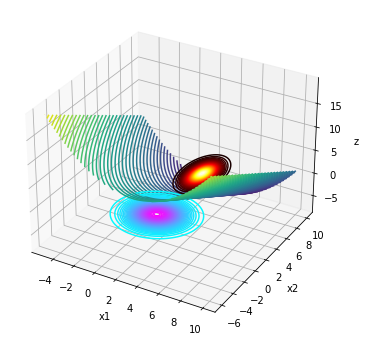

In [32]:
# 4d
def f(x, y):
    return 0.1875*(x**2) - 1.125*x + 3.5142 - y

x = np.linspace(-5, 10, 100)
y = np.linspace(-6, 10, 100)
X, Y = np.meshgrid(x, y)

def gauss(x=0, y=0, mx=0, my=0, sx=1, sy=1):
    return 1. / (2. * np.pi * sx * sy) * np.exp(-((x - mx)**2. / (2. * sx**2.) + (y - my)**2. / (2. * sy**2.)))

fig = plt.figure(figsize=(6,6))
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, f(X,Y), 50, cmap='viridis') # decision boundary
ax.contour3D(X, Y, gauss(X,Y,3,6,np.sqrt(0.5),np.sqrt(2)), 50, cmap='hot')
ax.contour3D(X, Y, gauss(X,Y,3,-2,np.sqrt(2),np.sqrt(2)), 50, cmap='cool')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('z')
plt.show()

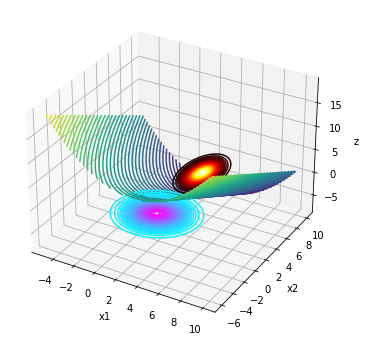

In [37]:
# 4f
def f(x, y):
    return 0.1875*(x**2) - 1.125*x + 3.3409 - y

x = np.linspace(-5, 10, 100)
y = np.linspace(-6, 10, 100)
X, Y = np.meshgrid(x, y)

def gauss(x=0, y=0, mx=0, my=0, sx=1, sy=1):
    return 1. / (2. * np.pi * sx * sy) * np.exp(-((x - mx)**2. / (2. * sx**2.) + (y - my)**2. / (2. * sy**2.)))

fig = plt.figure(figsize=(6,6))
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, f(X,Y), 50, cmap='viridis') # decision boundary
ax.contour3D(X, Y, gauss(X,Y,3,6,np.sqrt(0.5),np.sqrt(2)), 50, cmap='hot')
ax.contour3D(X, Y, gauss(X,Y,3,-2,np.sqrt(2),np.sqrt(2)), 50, cmap='cool')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('z')
plt.show()

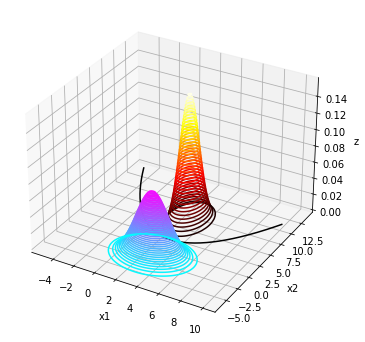

In [3]:
x = np.linspace(-5, 10, 100)
y = np.linspace(-6, 10, 100)
X, Y = np.meshgrid(x, y)

def gauss(x=0, y=0, mx=0, my=0, sx=1, sy=1):
    return 1. / (2. * np.pi * sx * sy) * np.exp(-((x - mx)**2. / (2. * sx**2.) + (y - my)**2. / (2. * sy**2.)))

fig = plt.figure(figsize=(6,6))
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, gauss(X,Y,3,6,np.sqrt(0.5),np.sqrt(2)), 50, cmap='hot')
ax.contour3D(X, Y, gauss(X,Y,3,-2,np.sqrt(2),np.sqrt(2)), 50, cmap='cool')
x = np.arange(-5,10,0.1)
y = 0.1875*(x**2) - 1.125*x + 3.5142
plt.plot(x,y,c='k')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('z')
plt.show()

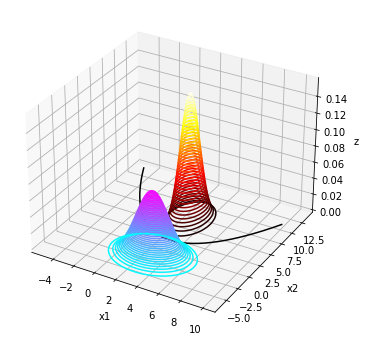

In [5]:
x = np.linspace(-5, 10, 100)
y = np.linspace(-6, 10, 100)
X, Y = np.meshgrid(x, y)

def gauss(x=0, y=0, mx=0, my=0, sx=1, sy=1):
    return 1. / (2. * np.pi * sx * sy) * np.exp(-((x - mx)**2. / (2. * sx**2.) + (y - my)**2. / (2. * sy**2.)))

fig = plt.figure(figsize=(6,6))
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, gauss(X,Y,3,6,np.sqrt(0.5),np.sqrt(2)), 50, cmap='hot')
ax.contour3D(X, Y, gauss(X,Y,3,-2,np.sqrt(2),np.sqrt(2)), 50, cmap='cool')
x = np.arange(-5,10,0.1)
y = 0.1875*(x**2) - 1.125*x + 3.3409
plt.plot(x,y,c='k')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('z')
plt.show()

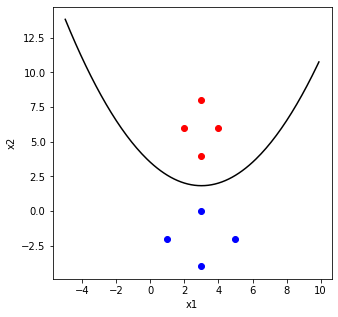

In [14]:
fig = plt.figure(figsize=(5,5))
x = np.arange(-5,10,0.1)
y = 0.1875*(x**2) - 1.125*x + 3.5142
X1 = np.array([[3,4,2,3],[4,6,6,8]])
X2 = np.array([[3,5,1,3],[0,-2,-2,-4]])
plt.scatter(X1[0,:],X1[1,:],c='r')
plt.scatter(X2[0,:],X2[1,:],c='b')
plt.plot(x,y,c='k')
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

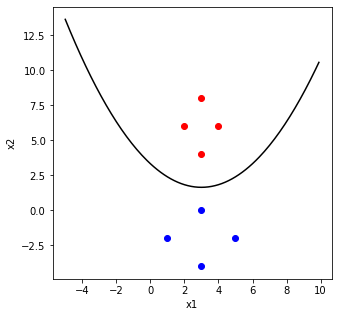

In [15]:
fig = plt.figure(figsize=(5,5))
x = np.arange(-5,10,0.1)
y = 0.1875*(x**2) - 1.125*x + 3.3409
X1 = np.array([[3,4,2,3],[4,6,6,8]])
X2 = np.array([[3,5,1,3],[0,-2,-2,-4]])
plt.scatter(X1[0,:],X1[1,:],c='r') 
plt.scatter(X2[0,:],X2[1,:],c='b')
plt.plot(x,y,c='k')
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

### Homework 6

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

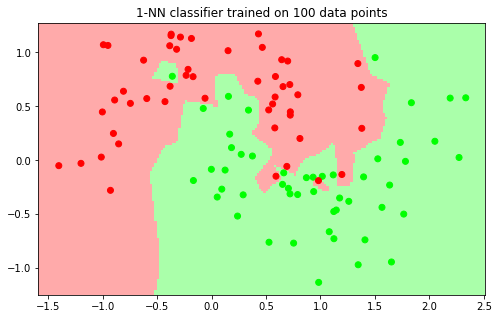

In [3]:
np.random.seed(2017) # Set random seed so results are repeatable
n = 100 # number of training points
## Generate a simple 2D dataset
X, y = datasets.make_moons(n,shuffle = True, noise = 0.3)

## Plot the decision boundary. 
# Begin by creating the mesh [x_min, x_max]x[y_min, y_max].
h = .02  # step size in the mesh
x_delta = (X[:, 0].max() - X[:, 0].min())*0.05 # add 5% white space to border
y_delta = (X[:, 1].max() - X[:, 1].min())*0.05
x_min, x_max = X[:, 0].min() - x_delta, X[:, 0].max() + x_delta
y_min, y_max = X[:, 1].min() - y_delta, X[:, 1].max() + y_delta
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00'])

for k in range(1,50,1):
    # Create instance of KNN classifier
    classifier = neighbors.KNeighborsClassifier(k, weights = 'uniform')
    classifier.fit(X, y)

    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(figsize = (8,5))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light, shading = 'auto')
    ## Plot the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("%i-NN classifier trained on %i data points" % (k,n))
    ## Show the plot
    plt.show()

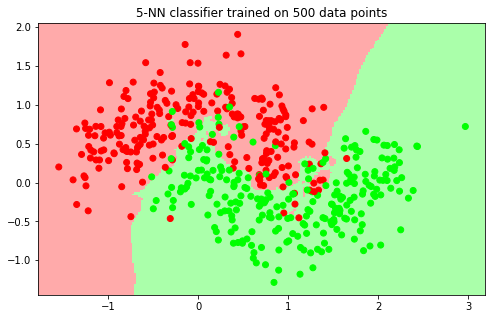

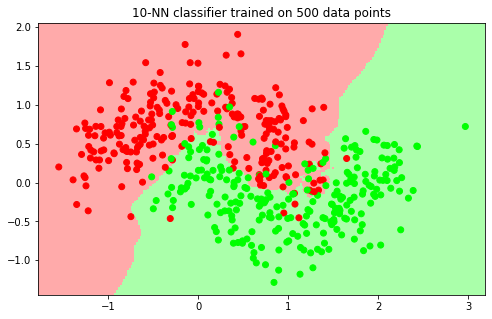

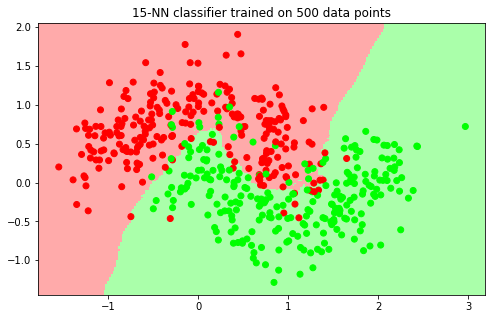

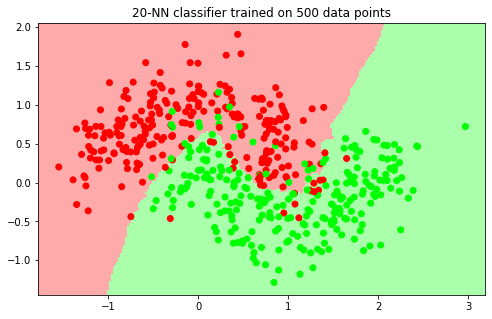

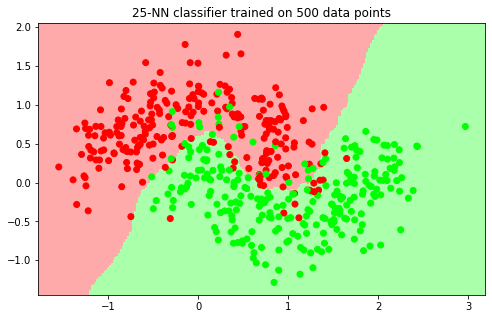

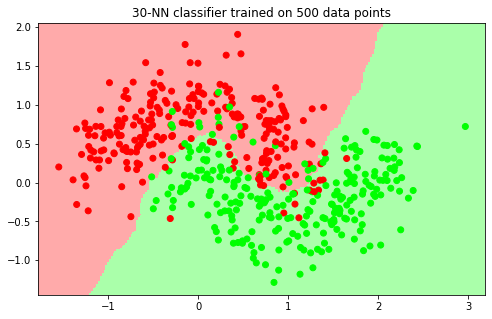

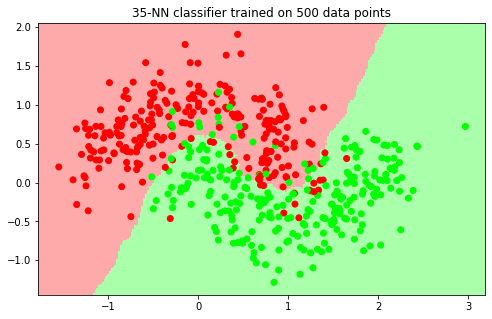

In [5]:
np.random.seed(2017) # Set random seed so results are repeatable
n = 500 # number of training points
## Generate a simple 2D dataset
X, y = datasets.make_moons(n,shuffle = True, noise = 0.3)

## Plot the decision boundary. 
# Begin by creating the mesh [x_min, x_max]x[y_min, y_max].
h = .02  # step size in the mesh
x_delta = (X[:, 0].max() - X[:, 0].min())*0.05 # add 5% white space to border
y_delta = (X[:, 1].max() - X[:, 1].min())*0.05
x_min, x_max = X[:, 0].min() - x_delta, X[:, 0].max() + x_delta
y_min, y_max = X[:, 1].min() - y_delta, X[:, 1].max() + y_delta
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00'])

for k in range(2,100,1):
    
    ## Create instance of KNN classifier
    classifier = neighbors.KNeighborsClassifier(k, weights = 'uniform')
    classifier.fit(X, y)

    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(figsize = (8,5))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light, shading = 'auto')
    ## Plot the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("%i-NN classifier trained on %i data points" % (k,n))
    ## Show the plot
    plt.show()

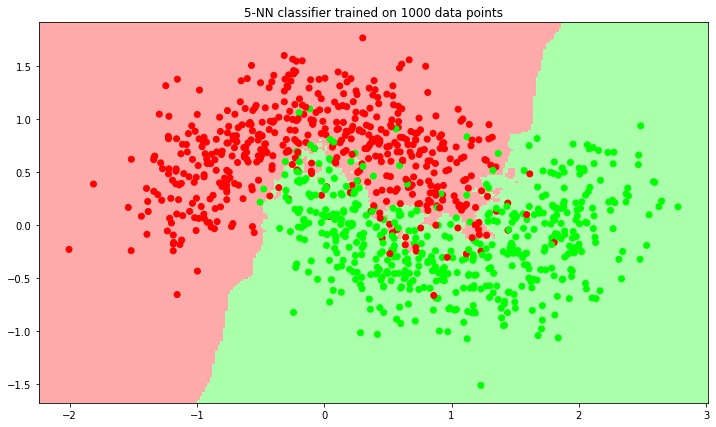

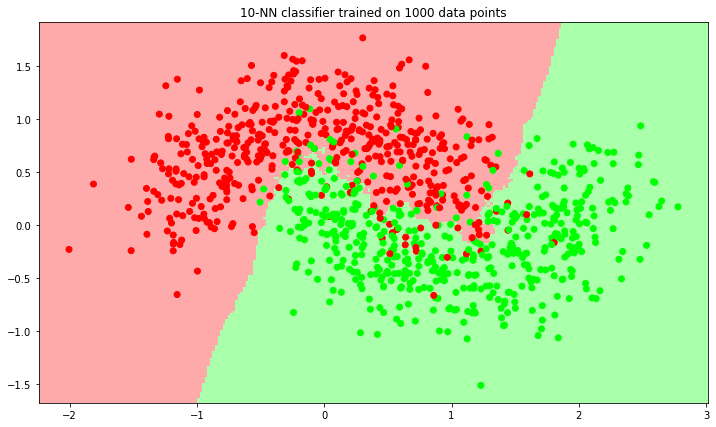

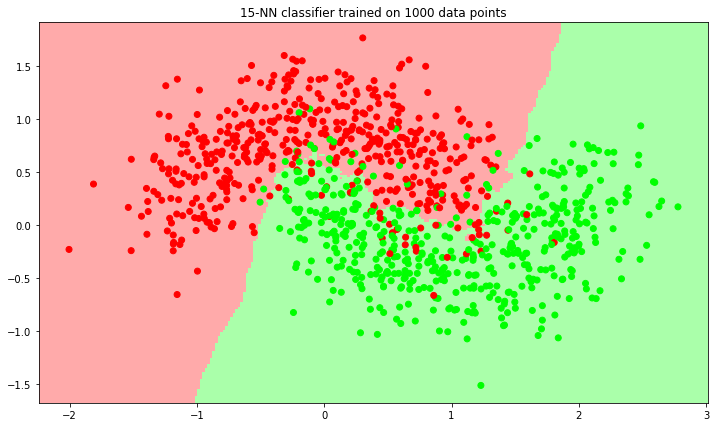

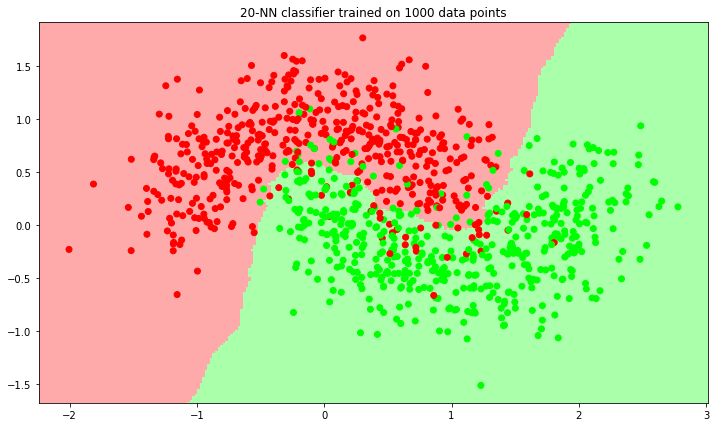

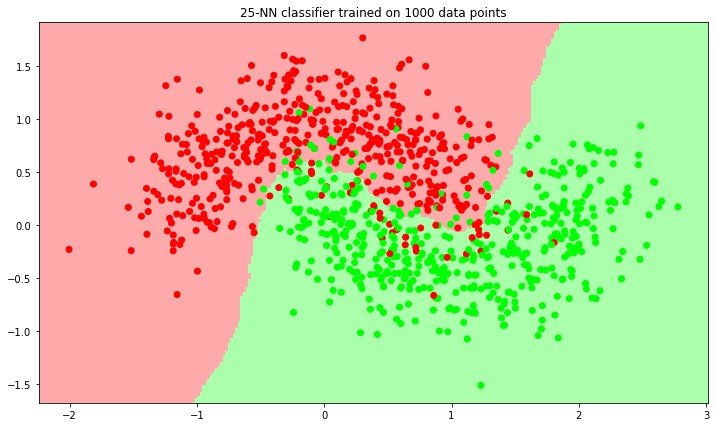

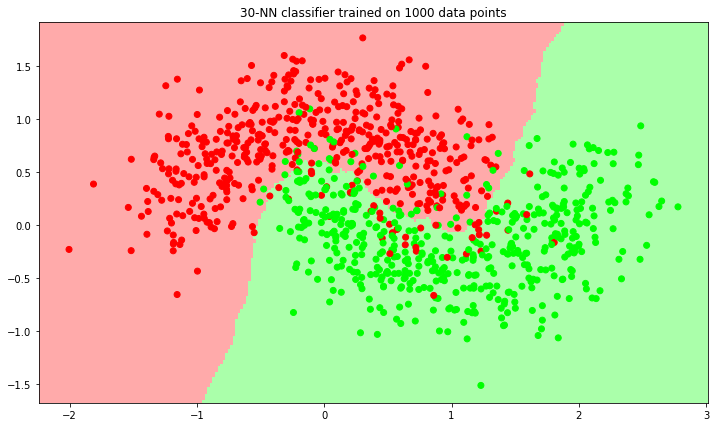

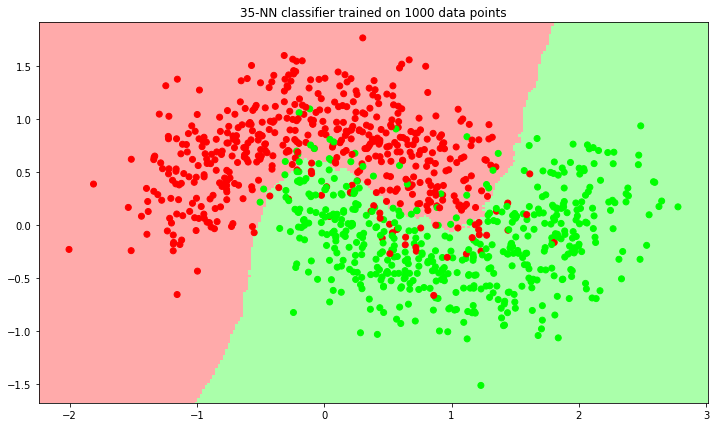

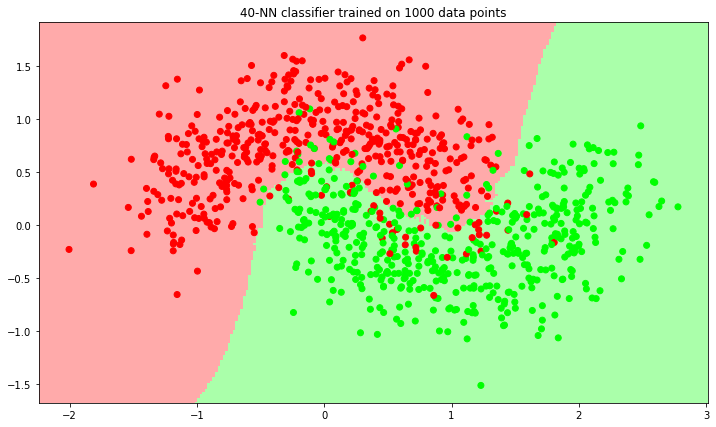

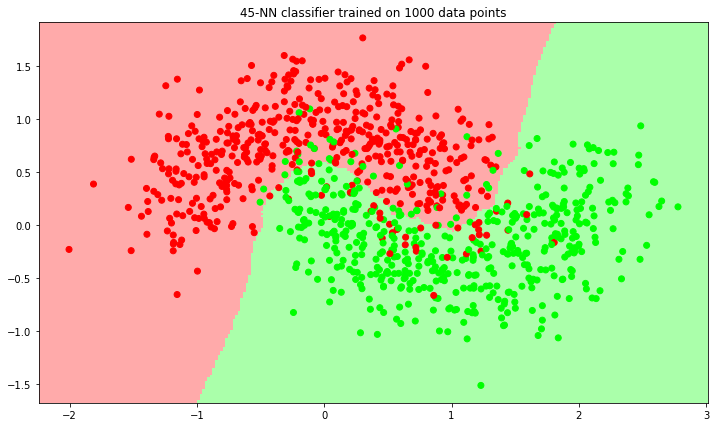

In [6]:
np.random.seed(2017) # Set random seed so results are repeatable
n = 1000 # number of training points
## Generate a simple 2D dataset
X, y = datasets.make_moons(n,shuffle = True, noise = 0.3)

## Plot the decision boundary. 
# Begin by creating the mesh [x_min, x_max]x[y_min, y_max].
h = .02  # step size in the mesh
x_delta = (X[:, 0].max() - X[:, 0].min())*0.05 # add 5% white space to border
y_delta = (X[:, 1].max() - X[:, 1].min())*0.05
x_min, x_max = X[:, 0].min() - x_delta, X[:, 0].max() + x_delta
y_min, y_max = X[:, 1].min() - y_delta, X[:, 1].max() + y_delta
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00'])

for k in range(2,200,2):
    
    ## Create instance of KNN classifier
    classifier = neighbors.KNeighborsClassifier(k, weights = 'uniform')
    classifier.fit(X, y)

    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(figsize = (12,7))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light, shading = 'auto')
    ## Plot the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("%i-NN classifier trained on %i data points" % (k,n))
    ## Show the plot
    plt.show()

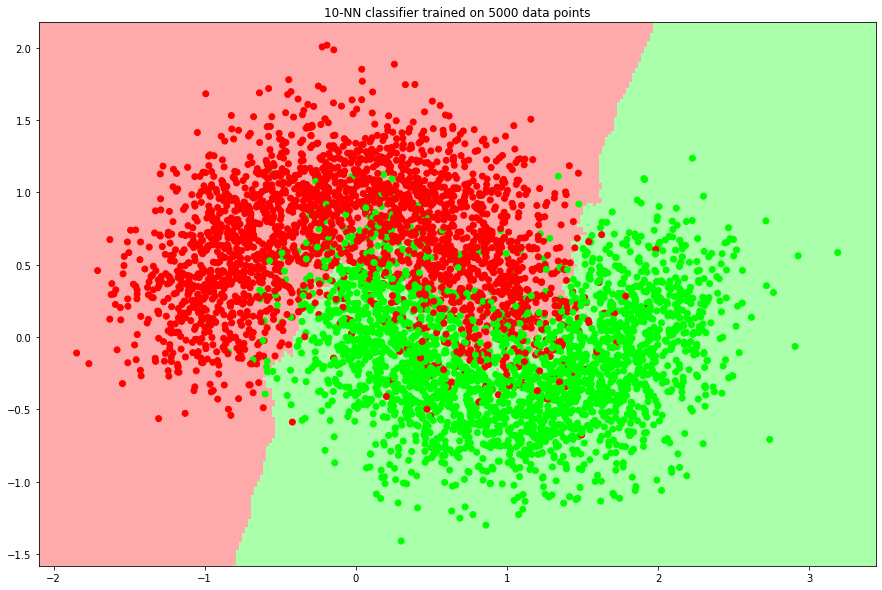

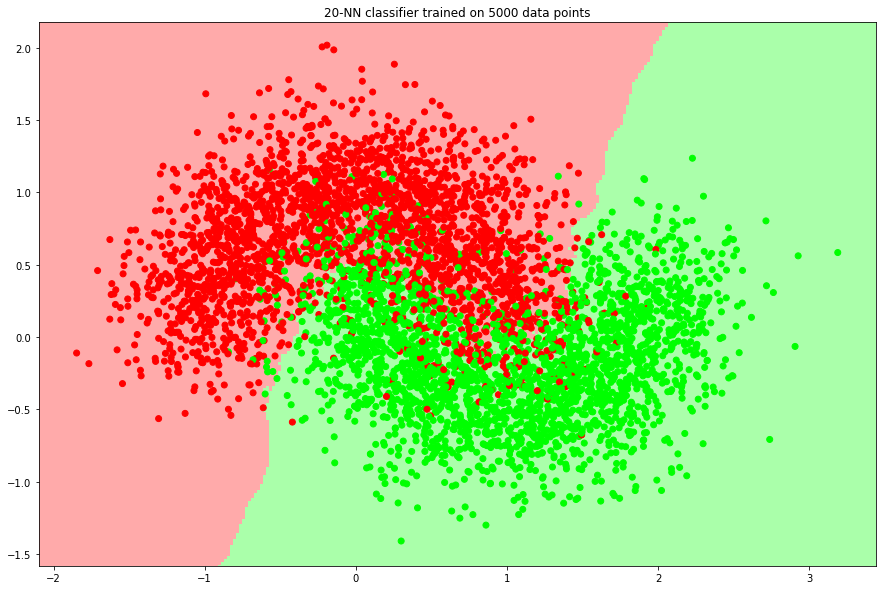

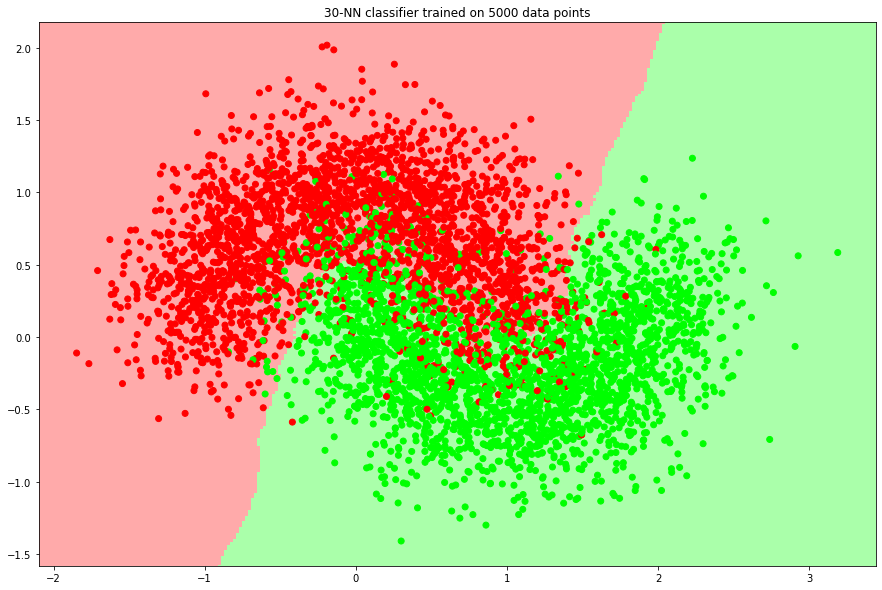

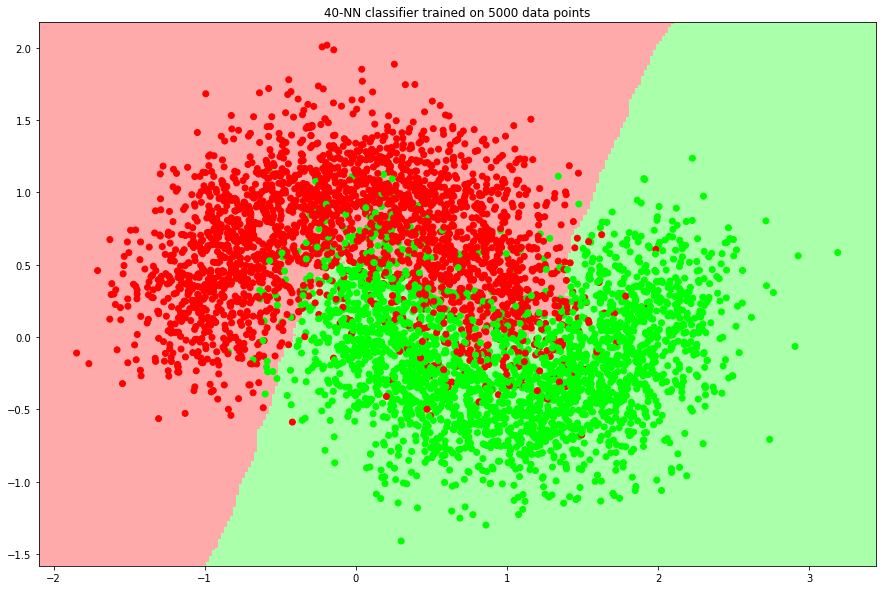

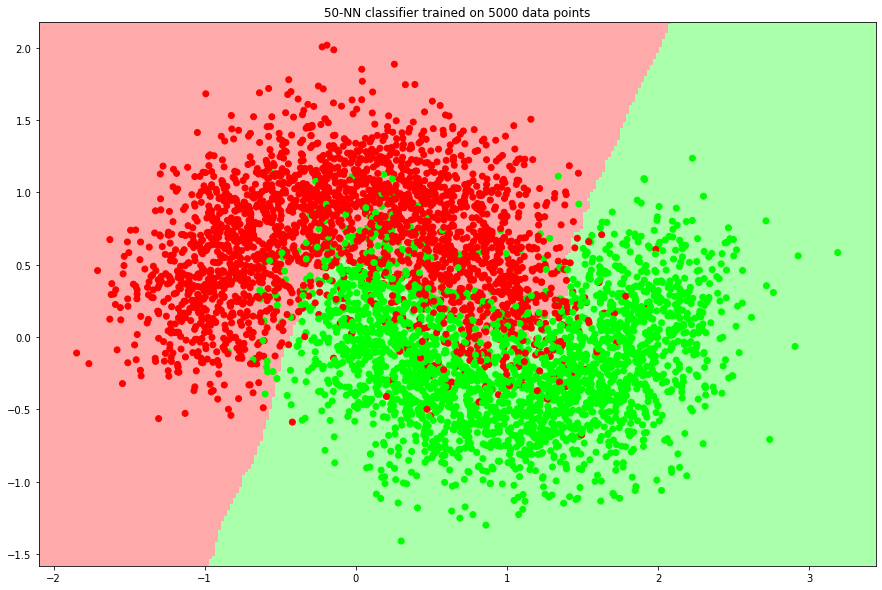

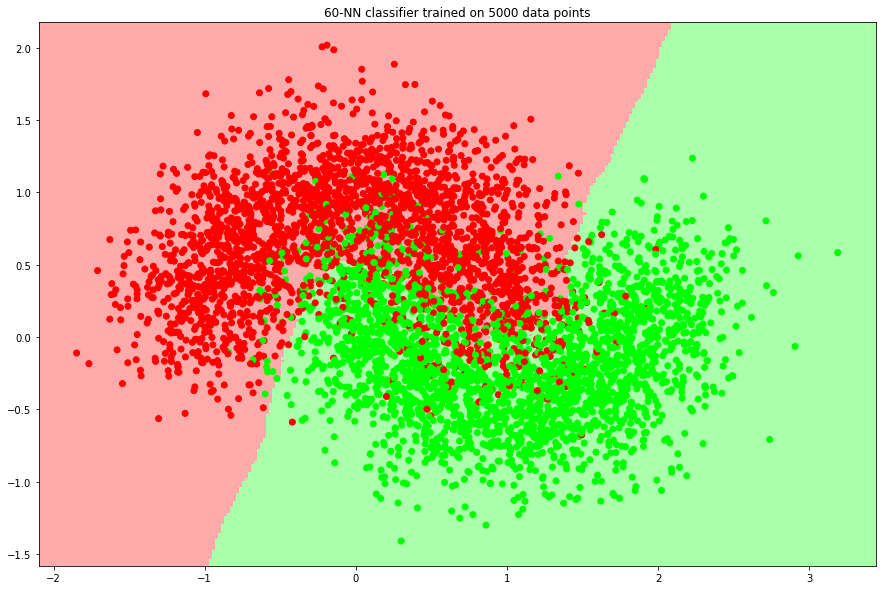

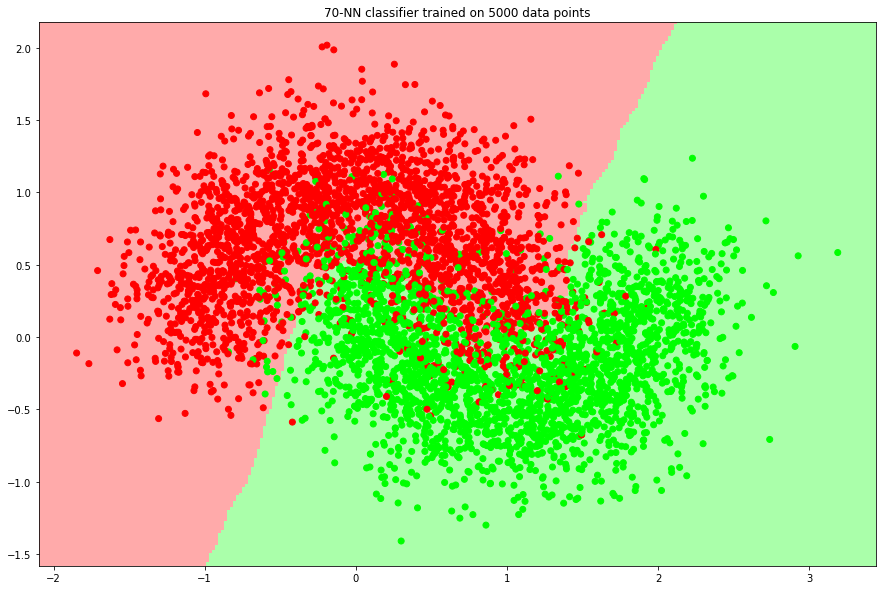

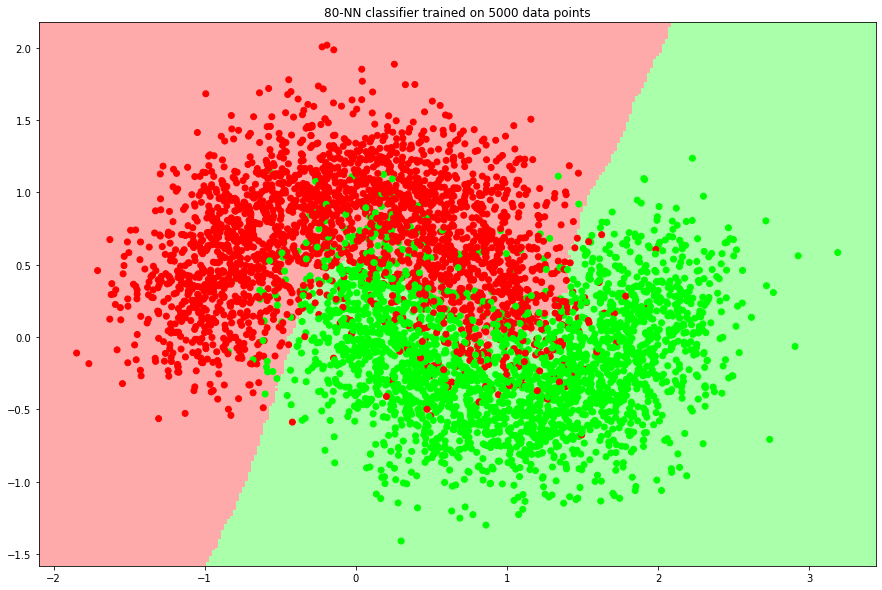

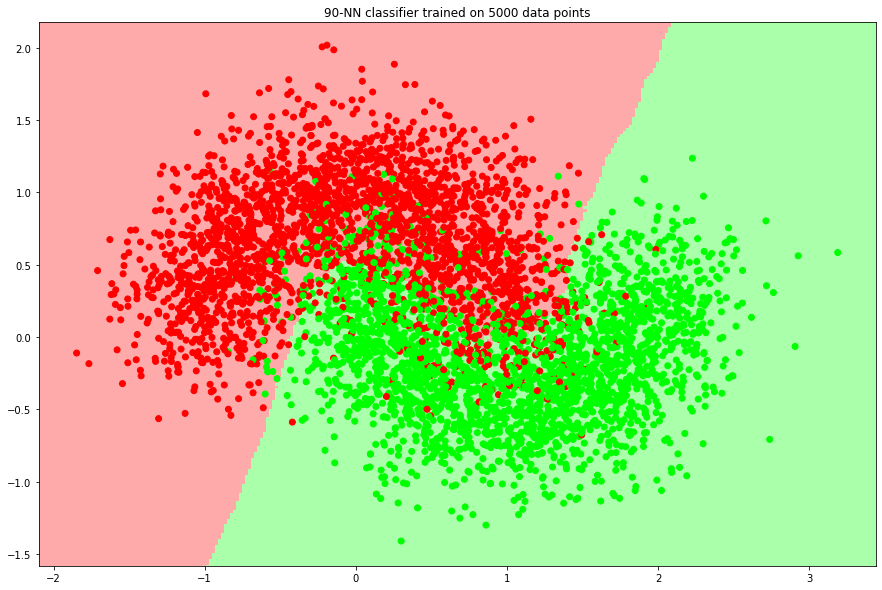

In [7]:
np.random.seed(2017) # Set random seed so results are repeatable
n = 5000 # number of training points
## Generate a simple 2D dataset
X, y = datasets.make_moons(n,shuffle = True, noise = 0.3)

## Plot the decision boundary. 
# Begin by creating the mesh [x_min, x_max]x[y_min, y_max].
h = .02  # step size in the mesh
x_delta = (X[:, 0].max() - X[:, 0].min())*0.05 # add 5% white space to border
y_delta = (X[:, 1].max() - X[:, 1].min())*0.05
x_min, x_max = X[:, 0].min() - x_delta, X[:, 0].max() + x_delta
y_min, y_max = X[:, 1].min() - y_delta, X[:, 1].max() + y_delta
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00'])

for k in range(10,1000,5):
    
    ## Create instance of KNN classifier
    classifier = neighbors.KNeighborsClassifier(k, weights = 'uniform')
    classifier.fit(X, y)

    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(figsize = (15,10))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light, shading = 'auto')
    ## Plot the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("%i-NN classifier trained on %i data points" % (k,n))
    ## Show the plot
    plt.show()

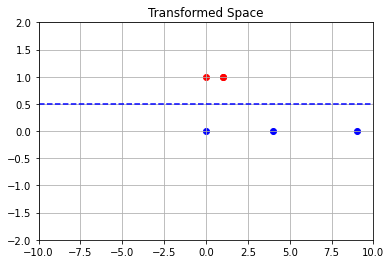

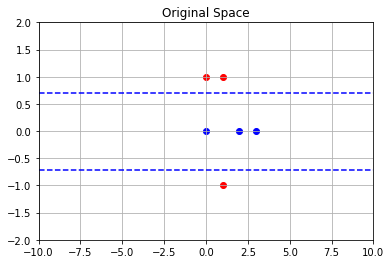

In [29]:
# 6.5
x1 = [1,1,0]; y1 = [1,1,1]
x2 = [0,9,4]; y2 = [0,0,0] 
plt.scatter(x1,y1, c = 'r')
plt.scatter(x2,y2, c='b')
plt.plot([-10,10],[0.5,0.5], 'b--')
plt.xlim([-10,10]); plt.ylim([-2,2])
plt.title("Transformed Space")
plt.grid()
plt.show()

x1 = [1,1,0]; y1 = [1,-1,1]
x2 = [0,3,2]; y2 = [0,0,0] 
plt.scatter(x1,y1, c = 'r')
plt.scatter(x2,y2, c='b')
plt.plot([-10,10],[np.sqrt(0.5),np.sqrt(0.5)], 'b--')
plt.plot([-10,10],[-np.sqrt(0.5),-np.sqrt(0.5)], 'b--')
plt.xlim([-10,10]); plt.ylim([-2,2])
plt.title("Original Space")
plt.grid()
plt.show()

## Homework 7

In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn import svm

In [3]:
X = mnist.data
y = mnist.target

X = X.to_numpy()
y = y.to_numpy()
y = np.array(list(map(lambda x: int(x), y)))

(70000, 784)
(70000,)


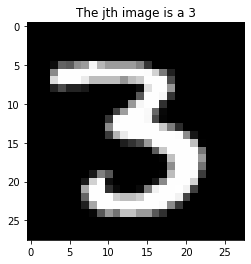

In [4]:
print(X.shape)
print(y.shape)

j = 12
plt.title('The jth image is a {label}'.format(label=int(y[j])))
plt.imshow(X[j].reshape((28,28)), cmap='gray')
plt.show()

In [5]:
# Get only data for classes 1 and 7
X1 = X[y==1,:]
X7 = X[y==7,:]
y1 = y[y==1]
y7 = y[y==7]
print(X1.shape)
print(X7.shape)

(7877, 784)
(7293, 784)


In [6]:
# Get shuffled train and test sets

np.random.seed(2021) # seed
shuffle_list = np.arange(0,8000) 
np.random.shuffle(shuffle_list)
X_train = np.concatenate((X1[:4000,:],X7[:4000,:]))[shuffle_list,:]
y_train = np.concatenate((y1[:4000],y7[:4000]))[shuffle_list]

print(X_train.shape, y_train.shape)

shuffle_list = np.arange(0,7877+7293-8000)
np.random.shuffle(shuffle_list)
X_test = np.concatenate((X1[4000:,:],X7[4000:,:]))[shuffle_list,:]
y_test = np.concatenate((y1[4000:],y7[4000:]))[shuffle_list]
print(X_test.shape, y_test.shape)

(8000, 784) (8000,)
(7170, 784) (7170,)


In [7]:
# Divide train set into fit and holdout sets
# 80-20 ratio
n = int(0.8*4000)
X_train_fit = X_train[:n,:]
y_train_fit = y_train[:n]

X_train_holdout = X_train[n:,:]
y_train_holdout = y_train[n:]

In [61]:
# grid search
N = 10
grid_c = np.logspace(-6,6,N)  # logarithmic
grid_gamma = np.logspace(-6,6,N)
grid_Pe = np.zeros((N,N))

# Train on train_fit set
for i in range(N):
    for j in range(N):
#         print(i,j)
        clf = svm.SVC(C=grid_c[i],kernel='rbf',gamma=grid_gamma[j])
        clf.fit(X_train_fit,y_train_fit)

        Pe = 1 - clf.score(X_train_holdout,y_train_holdout)
        grid_Pe[i,j] = Pe



0 0
0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 9
1 0
1 1
1 2
1 3
1 4
1 5
1 6
1 7
1 8
1 9
2 0
2 1
2 2
2 3
2 4
2 5
2 6
2 7
2 8
2 9
3 0
3 1
3 2
3 3
3 4
3 5
3 6
3 7
3 8
3 9
4 0
4 1
4 2
4 3
4 4
4 5
4 6
4 7
4 8
4 9
5 0
5 1
5 2
5 3
5 4
5 5
5 6
5 7
5 8
5 9
6 0
6 1
6 2
6 3
6 4
6 5
6 6
6 7
6 8
6 9
7 0
7 1
7 2
7 3
7 4
7 5
7 6
7 7
7 8
7 9
8 0
8 1
8 2
8 3
8 4
8 5
8 6
8 7
8 8
8 9
9 0
9 1
9 2
9 3
9 4
9 5
9 6
9 7
9 8
9 9


In [64]:
np.argmin(grid_Pe)

50

In [66]:
# Find best parameter values
C = grid_c[5]
gamma = grid_gamma[0]
print(np.min(grid_Pe))
print(C,gamma)

0.007916666666666683
4.641588833612772 1e-06


In [67]:
# Train on full set
clf = svm.SVC(C=C,kernel='rbf',gamma=gamma)
clf.fit(X_train,y_train)
sv_x = clf.support_vectors_ # Support vectors
sv_y = clf.support_ # Support vector labels

# Test
Pe = 1 - clf.score(X_test,y_test)
print("Test error: ",Pe)
print("No. of support vectors: ",len(sv_y))

Test error:  0.0044630404463040785
No. of support vectors:  1296


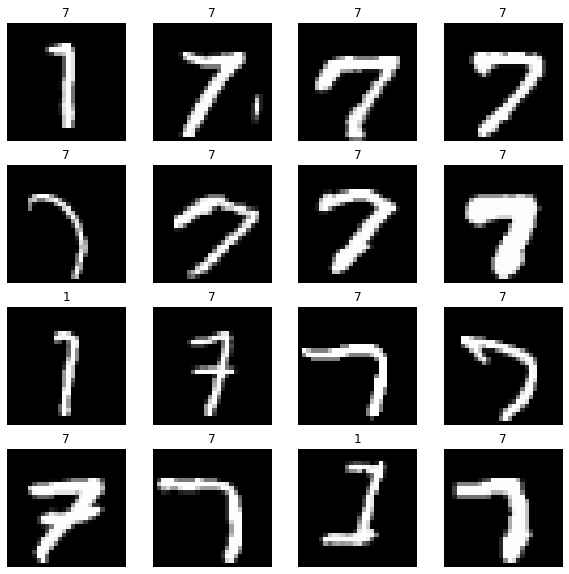

In [68]:
# Sort support vectors based on "hardness"
values = clf.decision_function(sv_x)
idx = np.argsort(abs(values))

plt.figure(figsize= (10,10))
ss = 1

# Plot 16 "hardest" points
for i in range(16):
    plt.subplot(4,4,ss)
    plt.imshow(sv_x[idx[i],:].reshape((28,28)), cmap='gray')
    plt.axis('off')
    plt.title(str(y_train[sv_y[idx[i]]]))
    ss += 1
    
plt.show()